# Predicting Hospital Readmission in Diabetes Patients
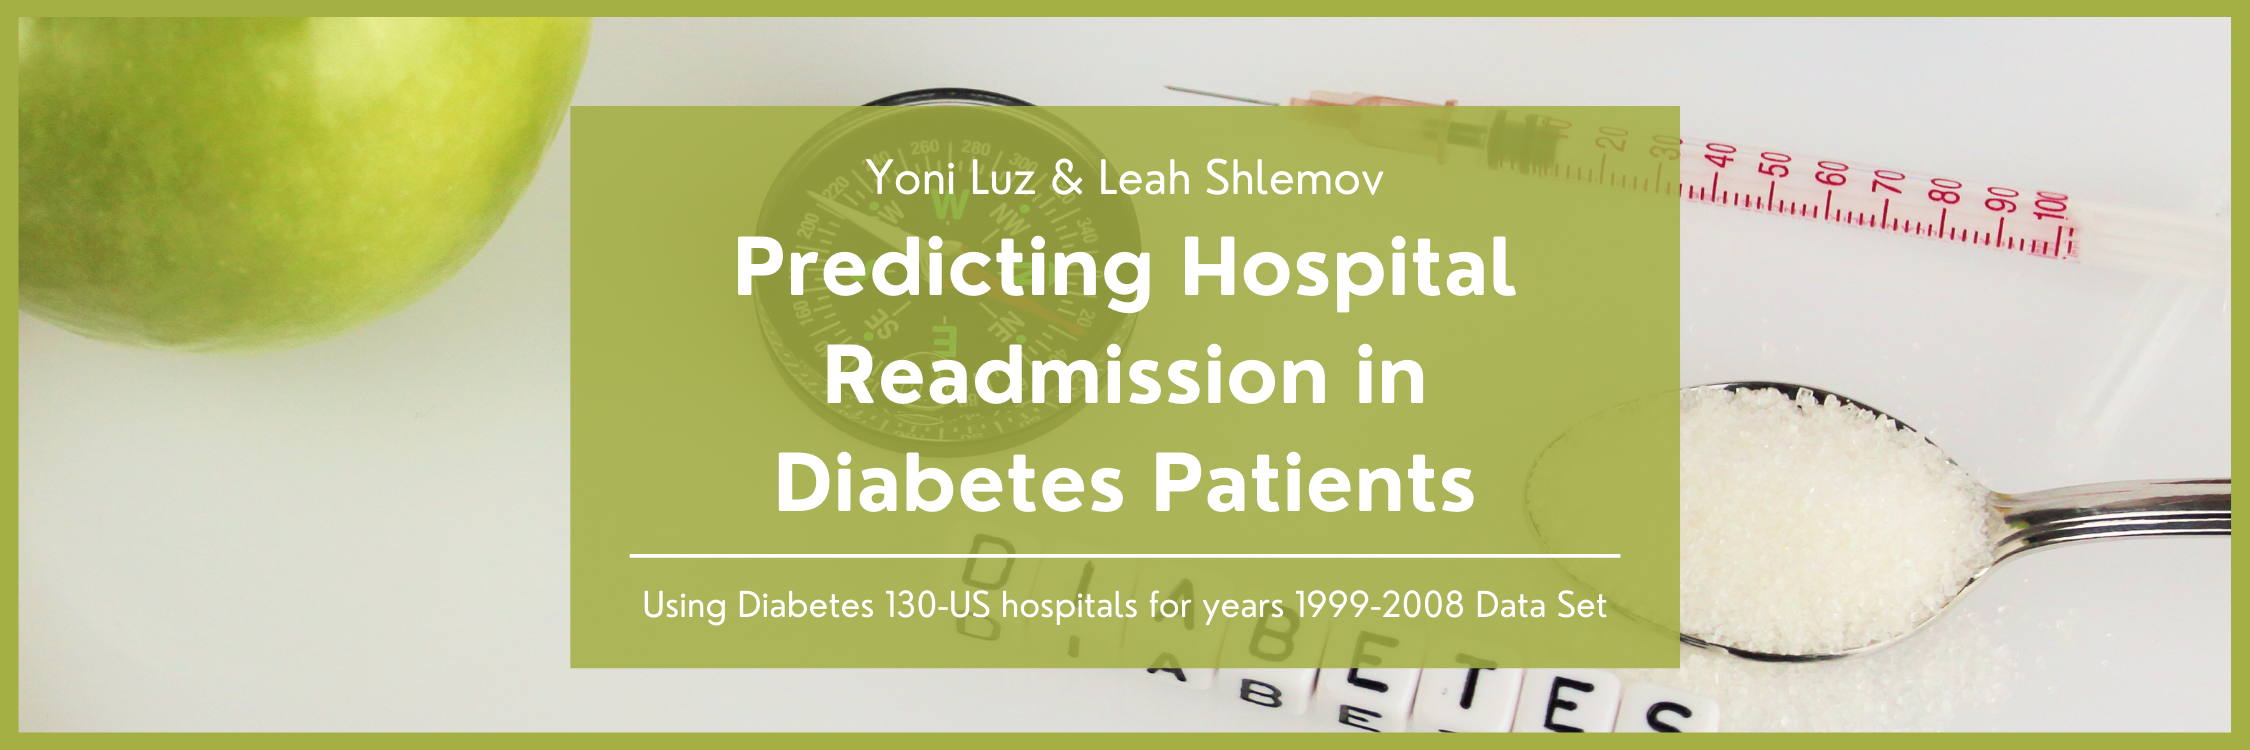

# Intro
We are Yoni (066620964) and Leah (315978437), two computer science students. 

We chose a classic dataset from the [UCI](https://archive.ics.uci.edu/ml/index.php) repository.

The UCI Machine Learning Repository is a free access database of machine learning problems, hosted and maintained by the Center for Machine Learning and Intelligent Systems at the University of California, Irvine.

Our goal is to predict readmission, in diabetes patients.

## The Problem
### Why Readmission is a Concern
**Hospital readmission** is a high-priority health care quality measure and target for cost reduction, particularly within 30 days of discharge (30-day readmission, aka early readmission). In recent years, government agencies and healthcare systems are increasingly focused on 30-day readmission rates as a way to improve quality and also determine the complexity of patient populations. Reducing readmission can cut nationwide health costs, increase the patient's quality of life, reduce hospital bed occupancy rate and reduce the amount of lost work days in patients participating in the workforce. Thus, this problem is both a health concern and an economical one.

### Why Focus on Diabetes Patients
**Diabetes mellitus**, commonly known as diabetes, is a metabolic disease that causes high blood sugar. There are 3 common types of diabetes: type 1 diabetes, type 2 diabetes and gestational diabetes.

Diabetes patients are prone to early hospital readmission: Their 30-day readmission rate is estimated to be between 14.4–22.7%, much higher than the rate for all hospitalized patients (8.5–13.5%). Apart from being a high risk condition for readmission, diabetes is a common disease. According to the WHO, in 2014, 8.5% of adults aged 18 years and older had diabetes. We chose to focus on readmission, both 30-day and over-30-day readmission (more on that later).


## Data Origins
The dataset was extracted from the [Health Facts database](https://sc-ctsi.org/resources/cerner-health-facts), spanning 10 years (1999-2008) and 130 hospitals and
integrated delivery networks throughout the United States. The information was extracted using the following criteria:

1.   It is an inpatient encounter (a hospital admission).
2.   It is a “diabetic” encounter, that is, one during which
any kind of diabetes was entered to the system as a
diagnosis.
3.  The length of stay was at least 1 day and at most 14
days.
4.  Laboratory tests were performed during the encounter.
5. Medications were administered during the encounter.

The features were selected by medical experts and consist of the following 55 features:

* **Encounter ID** - Unique identifier of an encounter
* **Patient number** - Unique identifier of a patient
* **Race** - Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender** - Values: male, female, and unknown/invalid
* **Age** - Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight** - Weight in pounds
* **Admission type** - Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition** - Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source** - Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital** - Integer number of days between admission and discharge
* **Payer code** - Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty** - Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures** - Number of lab tests performed during the encounter
* **Number of procedures** - Number of procedures (other than lab tests) performed during the encounter
* **Number of medications** - Number of distinct generic names administered during the encounter
* **Number of outpatient visits** - Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits** - Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits** - Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1** - The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2** - Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** - Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses** - Number of diagnoses entered to the system 
* **Glucose serum test result** - Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result** - Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications** - Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications** - Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* **24 features for medications** - For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted** - Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission




# Preprocessing
But first, imports:

In [1]:
!pip install shap 
!pip install imblearn 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import shap

# This seaborn theme has better contrast for 2-class visualizations
sns.set_theme()
sns.set_palette("Set1")

We have downloaded the dataset from the UCI dataset [repository](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008). The dataset is divided into two files: *'diabetic_data.csv'* containing the actual dataset and *'IDs_mapping.csv'* containing text labels for each number under the folowing columns in the first file:


*   admission_type_id 
*   discharge_disposition_id
*   admission_source_id

By looking at the second file, we found out it contains 3 seperate tables in a single *.csv* file, so we saved them into 3 dataframes for future reference and exploration. 

In [2]:
df = pd.read_csv("/content/IDs_mapping.csv")
# admission_type_id
admission_type_id = df.loc[:7,:]

display(admission_type_id)

# discharge_disposition_id
discharge_disposition_id = df.loc[9:39,:]
# set correct header
discharge_disposition_id.columns = discharge_disposition_id.iloc[0] 
discharge_disposition_id = discharge_disposition_id.drop(9)
discharge_disposition_id = discharge_disposition_id.reset_index(drop=True)

display(discharge_disposition_id)

# admission_source_id
admission_source_id = df.loc[41:,:]
# set correct header
admission_source_id.columns = admission_source_id.iloc[0] 
admission_source_id = admission_source_id.drop(41)
admission_source_id = admission_source_id.reset_index(drop=True)

display(admission_source_id)

admission_type_id    description
0                 1      Emergency
1                 2         Urgent
2                 3       Elective
3                 4        Newborn
4                 5  Not Available
5                 6            NaN
6                 7  Trauma Center
7                 8     Not Mapped

9  discharge_disposition_id                                        description
0                         1                                 Discharged to home
1                         2  Discharged/transferred to another short term h...
2                         3                      Discharged/transferred to SNF
3                         4                      Discharged/transferred to ICF
4                         5  Discharged/transferred to another type of inpa...
5                         6  Discharged/transferred to home with home healt...
6                         7                                           Left AMA
7                         8  Discharged/transferred to home under care of H...
8                         9          Admitted as an inpatient to this hospital
9                        10  Neonate discharged to another hospital for neo...
10                       11                                            Expired
11                       12  Still patient or expected to return for outpat...
12                       13                                     Hospice / home
13                       14                         Hospice / medical facility
14                       15  Discharged/transferred within this institution...
15                       16  Discharged/transferred/referred another instit...
16                       17  Discharged/transferred/referred to this instit...
17                       18                                                NaN
18                       19           Expired at home. Medicaid only, hospice.
19                       20  Expired in a medical facility. Medicaid only, ...
20                       21    Expired, place unknown. Medicaid only, hospice.
21                       22  Discharged/transferred to another rehab fac in...
22                       23  Discharged/transferred to a long term care hos...
23                       24  Discharged/transferred to a nursing facility c...
24                       25                                         Not Mapped
25                       26                                    Unknown/Invalid
26                       30  Discharged/transferred to another Type of Heal...
27                       27  Discharged/transferred to a federal health car...
28                       28  Discharged/transferred/referred to a psychiatr...
29                       29  Discharged/transferred to a Critical Access Ho...

41 admission_source_id                                        description
0                    1                                 Physician Referral
1                    2                                    Clinic Referral
2                    3                                       HMO Referral
3                    4                           Transfer from a hospital
4                    5     Transfer from a Skilled Nursing Facility (SNF)
5                    6         Transfer from another health care facility
6                    7                                     Emergency Room
7                    8                              Court/Law Enforcement
8                    9                                      Not Available
9                   10              Transfer from critial access hospital
10                  11                                    Normal Delivery
11                  12                                 Premature Delivery
12                  13                                          Sick Baby
13                  14                                   Extramural Birth
14                  15                                      Not Available
15                  17                                                NaN
16                  18           Transfer From Another Home Health Agency
17                  19             Readmission to Same Home Health Agency
18                  20                                         Not Mapped
19                  21                                    Unknown/Invalid
20                  22   Transfer from hospital inpt/same fac reslt in...
21                  23                          Born inside this hospital
22                  24                         Born outside this hospital
23                  25            Transfer from Ambulatory Surgery Center
24                  26                              Transfer from Hospice

By looking at the tables above, we can see that the 3 columns have multiple NA values bearing different names and codes.

**admission_type_id** has the codes 5/6/8 refering to "Not Available"/"NaN"/"Not Mapped".

**discharge_disposition_id** has the codes 18/25/26 refering to "NaN"/"Not Mapped"/"Unknown/Invalid".

**admission_source_id** has the codes 15/17/20/21 refering to "Not Available"/"NaN"/"Not Mapped"/"Unknown/Invalid".

It might be wise to consider the different codes on each column as one category. Let's move on and take a look at the actual dataset.

In [3]:
df = pd.read_csv("/content/diabetic_data.csv",
    engine='c',
    lineterminator='\r',
    skipinitialspace=True,
    na_values="?", low_memory=False)
df['encounter_id'] = df['encounter_id'].str.strip()
df.drop(index=101766, inplace=True) # The last row came out empty so we deleted it
df.head(8).T

0  ...            7
encounter_id                               2278392  ...        63768
patient_nbr                            8.22216e+06  ...  1.14883e+08
race                                     Caucasian  ...    Caucasian
gender                                      Female  ...         Male
age                                         [0-10)  ...      [70-80)
weight                                         NaN  ...          NaN
admission_type_id                                6  ...            1
discharge_disposition_id                        25  ...            1
admission_source_id                              1  ...            7
time_in_hospital                                 1  ...            5
payer_code                                     NaN  ...          NaN
medical_specialty         Pediatrics-Endocrinology  ...          NaN
num_lab_procedures                              41  ...           73
num_procedures                                   0  ...            0
num_medications                                  1  ...           12
number_outpatient                                0  ...            0
number_emergency                                 0  ...            0
number_inpatient                                 0  ...            0
diag_1                                      250.83  ...          428
diag_2                                         NaN  ...          492
diag_3                                         NaN  ...          250
number_diagnoses                                 1  ...            8
max_glu_serum                                 None  ...         None
A1Cresult                                     None  ...         None
metformin                                       No  ...           No
repaglinide                                     No  ...           No
nateglinide                                     No  ...           No
chlorpropamide                                  No  ...           No
glimepiride                                     No  ...           No
acetohexamide                                   No  ...           No
glipizide                                       No  ...           No
glyburide                                       No  ...       Steady
tolbutamide                                     No  ...           No
pioglitazone                                    No  ...           No
rosiglitazone                                   No  ...           No
acarbose                                        No  ...           No
miglitol                                        No  ...           No
troglitazone                                    No  ...           No
tolazamide                                      No  ...           No
examide                                         No  ...           No
citoglipton                                     No  ...           No
insulin                                         No  ...           No
glyburide-metformin                             No  ...           No
glipizide-metformin                             No  ...           No
glimepiride-pioglitazone                        No  ...           No
metformin-rosiglitazone                         No  ...           No
metformin-pioglitazone                          No  ...           No
change                                          No  ...           No
diabetesMed                                     No  ...          Yes
readmitted                                      NO  ...          >30

[50 rows x 8 columns]

The target column with the readmitted data came in string format, so we mapped it into a binary class: 1 for readmitted and 0 for non-readmitted.

In [4]:
df = df.replace({"readmitted" :{"NO":0,
                         "<30":1,
                         ">30":1}})

## Discharge disposition id

*'discharge_disposition_id'* tells us where the patient went after the hospitalization.

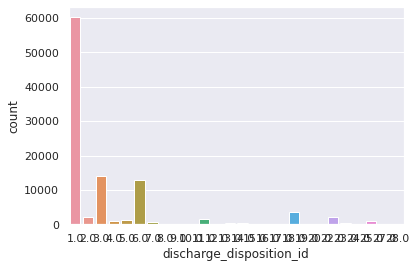

In [5]:
sns.countplot(x ="discharge_disposition_id", data = df)
plt.show()

Looking at the graph, we can see that some of the values are hardly used. Looking at the names for each id, we can see that some values are practically identical. We decided to reduce the values into 3 different groups:

1. "Discharged to Home" for ids with a name that includes "home"
2. np.nan for the unknown and the invalid
3. Other

In [6]:
mapped_discharge = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Other",3:"Other",4:"Other",
                    5:"Other",7:"Other",9:"Other",
                    10:"Other",11:"Other",12:"Other",
                    14:"Other",15:"Other",16:"Other",
                    17:"Other",20:"Other",21:"Other",
                    22:"Other",23:"Other",24:"Other",
                    27:"Other",28:"Other",29:"Other",30:"Other"}

df["discharge_disposition_id"] = df["discharge_disposition_id"].replace(mapped_discharge)

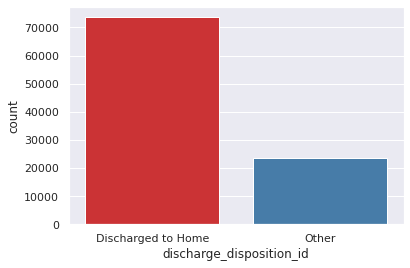

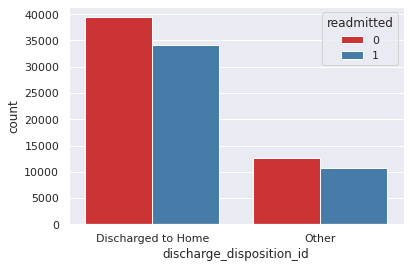

Proportions of ID's


In [7]:
sns.countplot(x ="discharge_disposition_id", data = df)
plt.show()

sns.countplot(x ="discharge_disposition_id", hue = "readmitted", data = df)
plt.show()

print("Proportions of ID's")

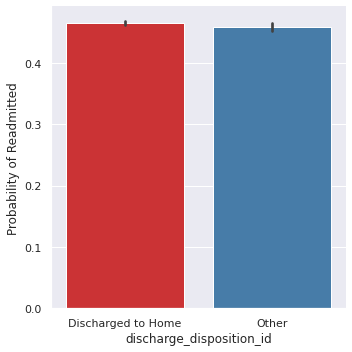

In [8]:
g = sns.catplot(x = "discharge_disposition_id", y="readmitted", 
                data = df, height = 5, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()

We can see that the probability of being readmitted is much the same for patients who were discharged home versus patients who were discharged for other reasons.

##Admission Source ID

An Identifier corresponding to 21 distinct values. For example, physician referral, emergency room, and transfer from a hospital.

Let's see the value distribution:

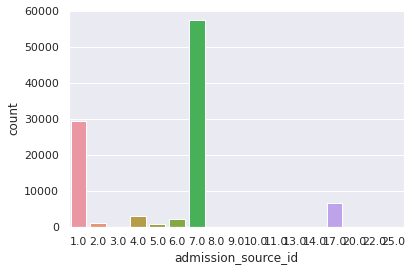

In [9]:
sns.countplot(x ="admission_source_id", data = df)
plt.show()

Again, we see that some values are hardly used. We chose to merge similar admission sources together. We came up with the following categories:

1.   Referral
2.   Other
3.   nan
4.   Emergency



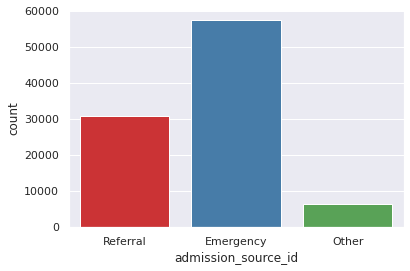

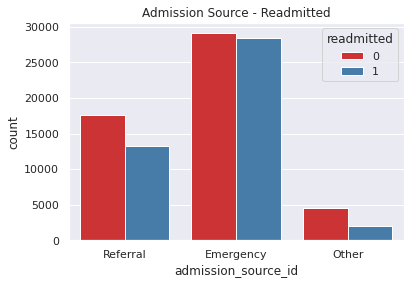

Emergency    57494
Referral     30856
Other         6474
Name: admission_source_id, dtype: int64


In [10]:
mapped_adm = {1:"Referral",2:"Referral",3:"Referral",
              4:"Other",5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
              9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
              15:np.nan,17:np.nan,20:np.nan,21:np.nan,
              7:"Emergency"}
df.admission_source_id = df.admission_source_id.replace(mapped_adm)

sns.countplot(x = "admission_source_id", data = df)
plt.show()

sns.countplot(x = "admission_source_id", hue = "readmitted", data = df)
plt.title("Admission Source - Readmitted")
plt.show()


print(df.admission_source_id.value_counts())

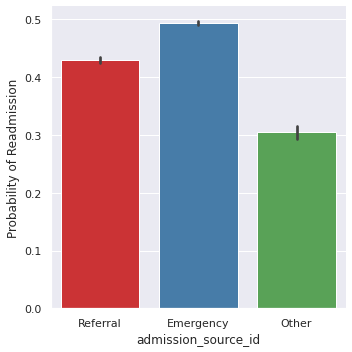

In [11]:
g = sns.catplot(x = "admission_source_id", y ="readmitted", 
                    data = df, kind = "bar", height= 5)
g.set_ylabels("Probability of Readmission")
plt.show()

Emergency admissions have the highest probability of readmission, significantly higher than refferal admissions and other admissions. 

##Admission Type ID


Identifier corresponding to 9 distinct values;

Emergency : 1
Urgent : 2
Elective : 3
Newborn : 4
Not Available : 5
NULL : 6
Trauma Center : 7
Not Mapped : 8

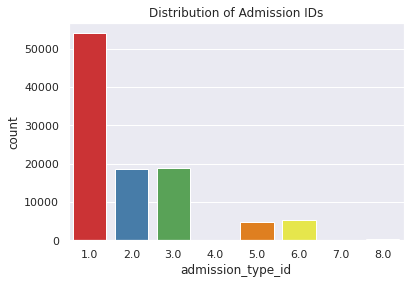

Distribution of ID's
1.0    53990
3.0    18869
2.0    18480
6.0     5291
5.0     4785
8.0      320
7.0       21
4.0       10
Name: admission_type_id, dtype: int64


In [12]:
sns.countplot(x = "admission_type_id", data = df)
plt.title("Distribution of Admission IDs")
plt.show()

print("Distribution of ID's")
print(df.admission_type_id.value_counts())

We have the same pattern we saw in the previous two columns - values that are hardly used. Now we made the following categories:

1.    Emergency for "urgent" and "Emergency"
2.    np.nan for NULL, Not Available and Not Mapped values
3.    New born
4.    Trauma center
5.    Elective

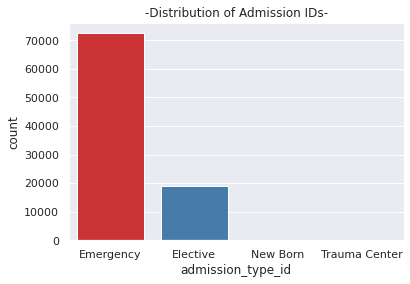

-Distribution of ID's-
Emergency        72470
Elective         18869
Trauma Center       21
New Born            10
Name: admission_type_id, dtype: int64


In [13]:
mapped = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0:np.nan,
          6.0:np.nan,
          7.0:"Trauma Center",
          8.0:np.nan}

df.admission_type_id = df.admission_type_id.replace(mapped)

sns.countplot(x = "admission_type_id", data = df)
plt.title("-Distribution of Admission IDs-")
plt.show()

print("-Distribution of ID's-")
print(df.admission_type_id.value_counts())

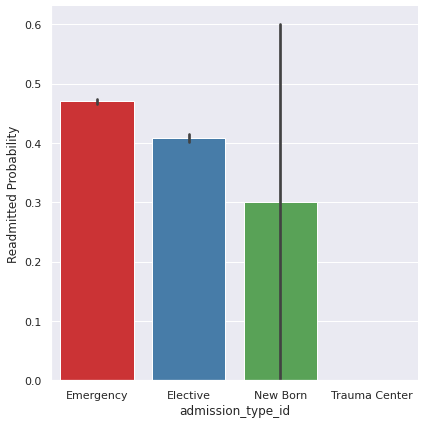

In [14]:
g = sns.catplot(x = "admission_type_id", y ="readmitted", 
                    data = df, height = 6, kind = "bar")
g.set_ylabels("Readmitted Probability")
plt.show()

##Time in Hospital

Integer number of days between admission and discharge. In layman's terms, the number of days a patient stayed in hospital. Let's see the distribution of days:

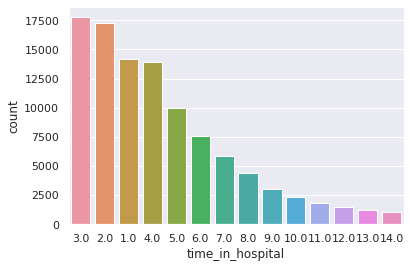

3.0     17756
2.0     17224
1.0     14208
4.0     13924
5.0      9966
6.0      7539
7.0      5859
8.0      4391
9.0      3002
10.0     2342
11.0     1855
12.0     1448
13.0     1210
14.0     1042
Name: time_in_hospital, dtype: int64


In [15]:
sns.countplot(x="time_in_hospital", data = df,
              order = df.time_in_hospital.value_counts().index)
plt.show()

print(df.time_in_hospital.value_counts())

Most of people stayed 2 - 3 days in hospital.
Let's see the frequency of readmission or no readmission for each number of days:

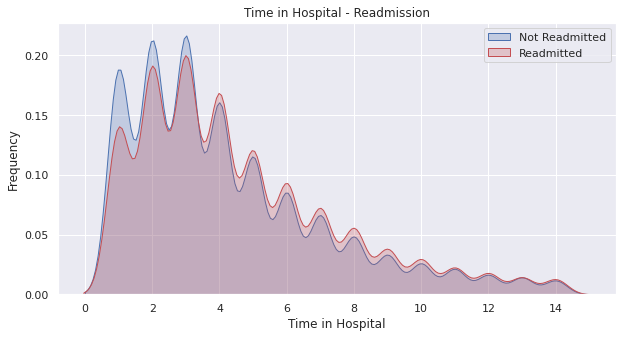

In [16]:
fig = plt.figure(figsize=(10,5))

#readmitted = 0
ax = sns.kdeplot(df.loc[(df.readmitted == 0), "time_in_hospital"],
                 color = "b", shade = True, label = "Not Readmitted")

ax = sns.kdeplot(df.loc[(df.readmitted == 1), "time_in_hospital"],
                 color = "r", shade = True, label = "Readmitted")
ax.legend(loc="upper right")

ax.set_xlabel("Time in Hospital")
ax.set_ylabel("Frequency")
ax.set_title("Time in Hospital - Readmission")
plt.show()

This figure offers us an interesting insight and an opportunity to make classification easier. By looking at the graph, we can see that patients who were inpatient for 4 days and under are more likely to not be readmitted (blue curve higher than red curve) while patients who were inpatient more than 4 days are more likely to be readmitted (red curve higher than blue curve).

We can turn this feature to a binary feature we will call "long stay". 

In [17]:
df.time_in_hospital = df.time_in_hospital > 4
df = df.rename(columns={"time_in_hospital": "long_stay"})
df.head()

encounter_id  patient_nbr             race  ... change diabetesMed readmitted
0      2278392    8222157.0        Caucasian  ...     No          No          0
1       149190   55629189.0        Caucasian  ...     Ch         Yes          1
2        64410   86047875.0  AfricanAmerican  ...     No         Yes          0
3       500364   82442376.0        Caucasian  ...     Ch         Yes          0
4        16680   42519267.0        Caucasian  ...     Ch         Yes          0

[5 rows x 50 columns]

##Medical Specialty
Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family\general practice, and surgeon

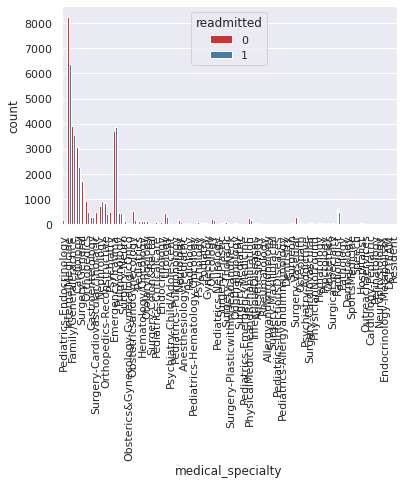

In [18]:
sns.countplot(x = "medical_specialty", hue = "readmitted",data = df)
plt.xticks(rotation = 90)
plt.show()

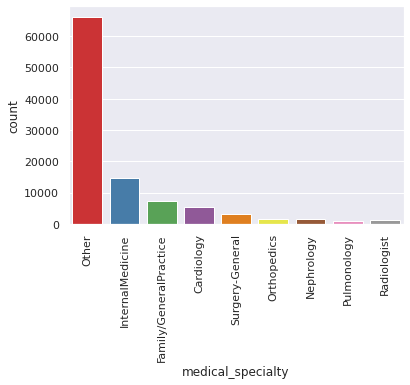

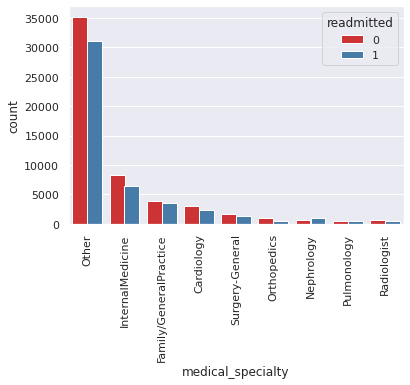

In [19]:
top_10=['InternalMedicine','Family/GeneralPractice','Cardiology','Surgery-General',
        "Nephrology","Orthopedics","Radiologist","Pulmonology"]

df.loc[~df['medical_specialty'].isin(top_10),'medical_specialty']='Other'



sns.countplot(x = "medical_specialty", data = df)
plt.xticks(rotation = 90)
plt.show()

sns.countplot(x = "medical_specialty",hue = "readmitted", data = df)
plt.xticks(rotation = 90)
plt.show()

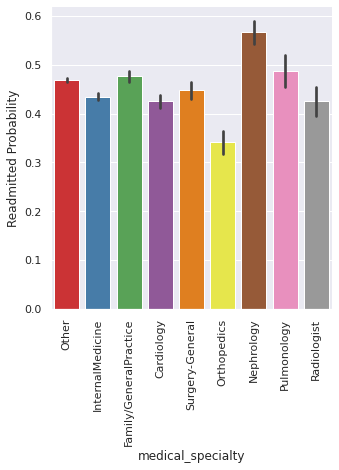

In [20]:
sns.catplot(x = "medical_specialty", y = "readmitted",
               data = df, kind = "bar", height = 5)
plt.ylabel("Readmitted Probability")
plt.xticks(rotation = 90)
plt.show()

We clearlt see that the Nephrology section has more probability than others


In [21]:
df.head()

encounter_id  patient_nbr             race  ... change diabetesMed readmitted
0      2278392    8222157.0        Caucasian  ...     No          No          0
1       149190   55629189.0        Caucasian  ...     Ch         Yes          1
2        64410   86047875.0  AfricanAmerican  ...     No         Yes          0
3       500364   82442376.0        Caucasian  ...     Ch         Yes          0
4        16680   42519267.0        Caucasian  ...     Ch         Yes          0

[5 rows x 50 columns]

# EDA



## Class balance
Let's see how balanced or unbalanced the dataset is.

readmitted
0    54864
1    46902
dtype: int64

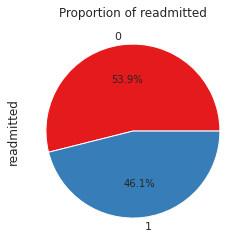

In [22]:
display(df.groupby("readmitted").size())

df.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of readmitted")
plt.show()

We need to analyze differen types of features seperately, so we will split the colomns into two:

1.   Categorical columns
2.   Numerical colomns


**Categorical columns:**

In [23]:
categorical= [
  'gender',
  'race',
  'medical_specialty',
  'admission_type_id',
  'discharge_disposition_id',
  'admission_source_id',
  'max_glu_serum',
  'A1Cresult',
  'metformin',
  'repaglinide',
  'nateglinide',
  'chlorpropamide',
  'glimepiride',
  'glipizide',
  'glyburide',
  'pioglitazone',
  'rosiglitazone',
  'payer_code',
  'diag_1',
  'diag_2',
  'diag_3',
  'insulin',
  'glyburide-metformin',
  'change',
  'diabetesMed',
  'acarbose'
  ]

## Categorial demographic data

First, we would like to display readmission count and percentage for some of the columns. This would give us a good representation of the distribution of data and the effect of each column on the readmission rate.

The ***plotCountAndPercentage*** function will plot the two graphs.

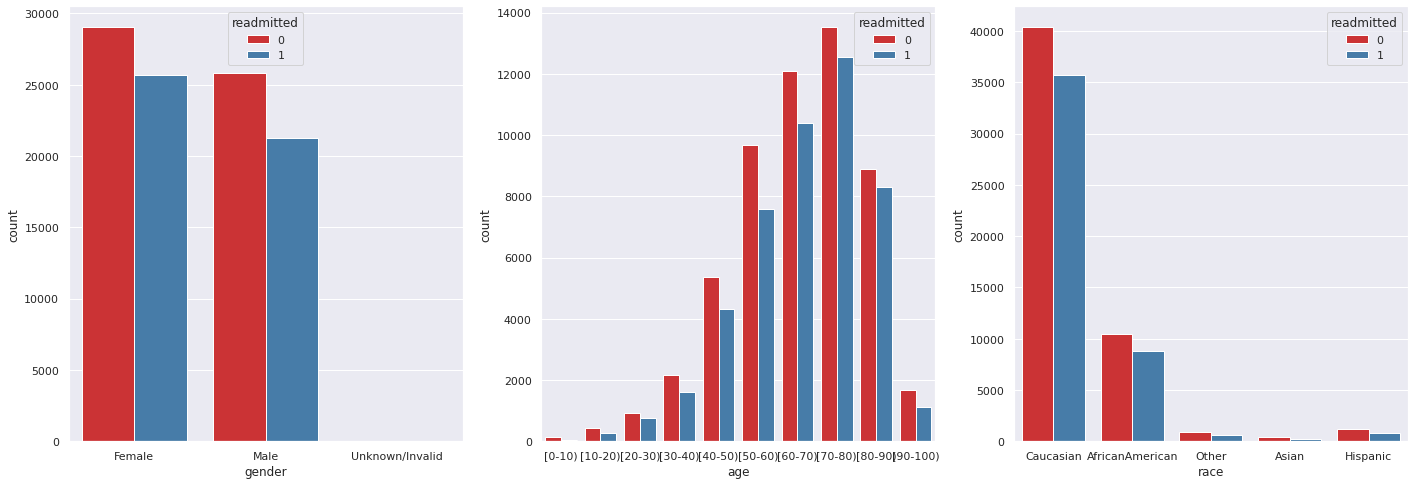

In [24]:
# looking at the impact of each of 'gender','age','race' on the target class
visual_list = ['gender','age','race']
fig, ax =plt.subplots(nrows=1,ncols=3,figsize=(24,8))
ax_col =0
for i in visual_list:
    sns.countplot(x=df[i], hue=df.readmitted, ax=ax[ax_col]);
    ax_col = ax_col+1

Looking at the figures above we see that females that are between 80-90 years old and their race is caucasin are the most readmitted among all the types of people.

In [25]:
df.groupby(by = "insulin").readmitted.mean()


insulin
Down      0.527910
No        0.436971
Steady    0.451068
Up        0.515376
Name: readmitted, dtype: float64

Visualising the impact of insulin intake on the target class


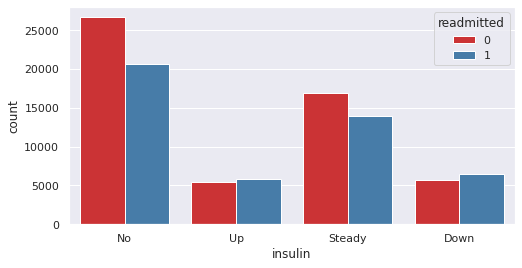

In [26]:
fig =plt.subplots(figsize=(8,4))
sns.countplot(x="insulin", hue="readmitted", data=df, )
plt.show()

The figure indicates that the people who does not take insulin are the most readmitted

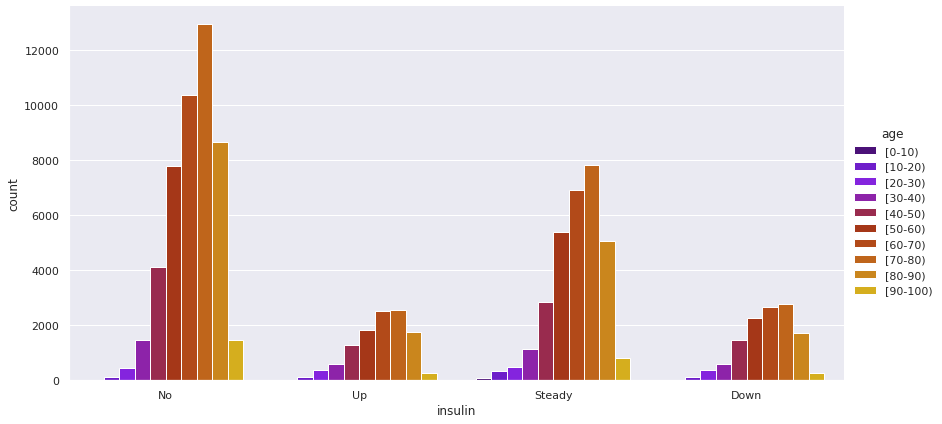

In [27]:
age_list = list(df.age.unique())
sns.catplot(x="insulin", hue="age", data=df, kind="count", height=6, aspect=2, palette="gnuplot");

The figure indicates that the people who does not take insulin and their age is between 70-80 are the most readmitted, and people with age between 70-80 are the most readmitted in all types of insulin intake

In [28]:
def plotCountAndPercentage(column):
  # by count
  plt.figure(figsize=(15,8))
  ax = sns.countplot(x=column, hue= "readmitted", data = df)
  plt.xticks(rotation=90)
  plt.title("Readmission by " + column.upper())
  plt.show()

  # by percentage
  percent_data = df.groupby(column)["readmitted"].value_counts(normalize=True).mul(100).rename('percent').reset_index()
  ax2 = sns.catplot(x=column, y="percent", hue="readmitted", data=percent_data, kind="bar")
  plt.xticks(rotation=90)
  plt.title("Readmission percentage by " + column.upper())
  ax2.fig.set_figwidth(15)
  ax2.fig.set_figheight(8)
  plt.show()

  # crosstab for the accurate percentage numbers
  display(pd.crosstab(df['readmitted'], df[column], normalize='columns'))
  

### Race

We have 5 different races value, these are;

Caucasian
AfricanAmerican
Hispanic
Asian
Other

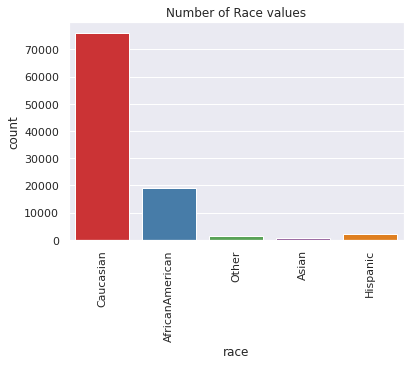

Proportion of Race
Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: race, dtype: float64


In [29]:
sns.countplot(x=df.race, data = df)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(df.race.value_counts(normalize = True)*100)

As we see, there is Caucasians in 76 percent of all our data. And other other 24 percent is divided into African Americans, Hispanics, Asians and Others.
Here we decided to divide into 3 groups like Caucasian, African American and Other.

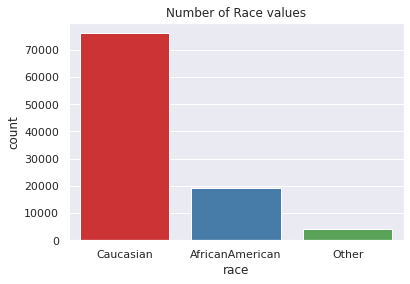

Proportion of Race After the Mapping
Caucasian          76.486788
AfricanAmerican    19.307891
Other               4.205321
Name: race, dtype: float64


In [30]:
mapped_race = {"Asian":"Other","Hispanic":"Other"}
df.race = df.race.replace(mapped_race)

sns.countplot(x="race", data = df)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race After the Mapping")
print(df.race.value_counts(normalize= True)*100)

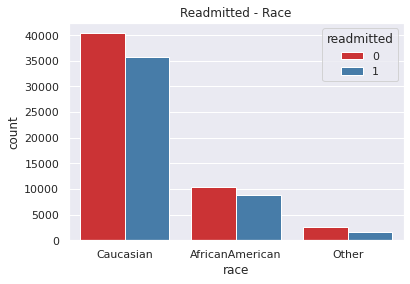

In [31]:
sns.countplot(x="race", hue= "readmitted", data = df)
plt.title("Readmitted - Race")
plt.show()

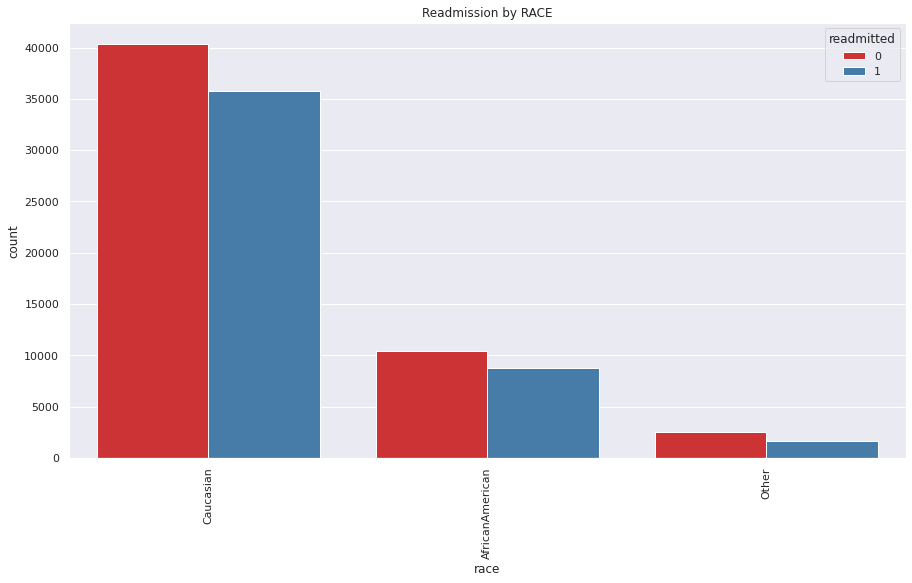

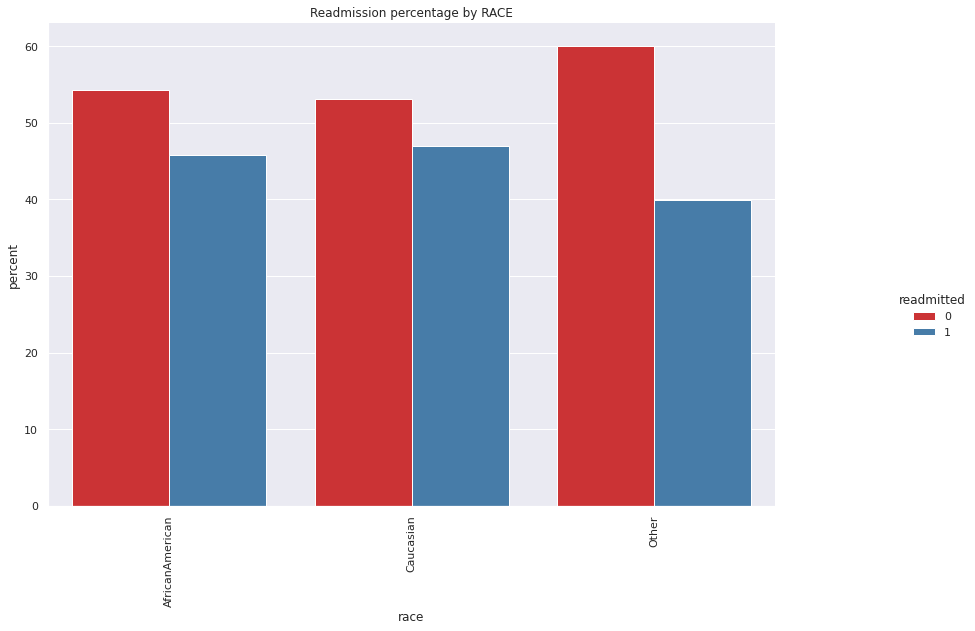

race        AfricanAmerican  Caucasian     Other
readmitted                                      
0                  0.542478   0.530664  0.600621
1                  0.457522   0.469336  0.399379

In [32]:
plotCountAndPercentage('race')

**Conclusion**: Looks like race has no significant effect on readmission, as the percentage of readmission doesn't vary between races. We might delete this column later to reduce the dataset's dimention.

### Gender

In our first plot, we have noticed an almost empty category in this column: *Unknown/Invalid*. It contained only 3 rows, so we decided to delete this rows entirely.

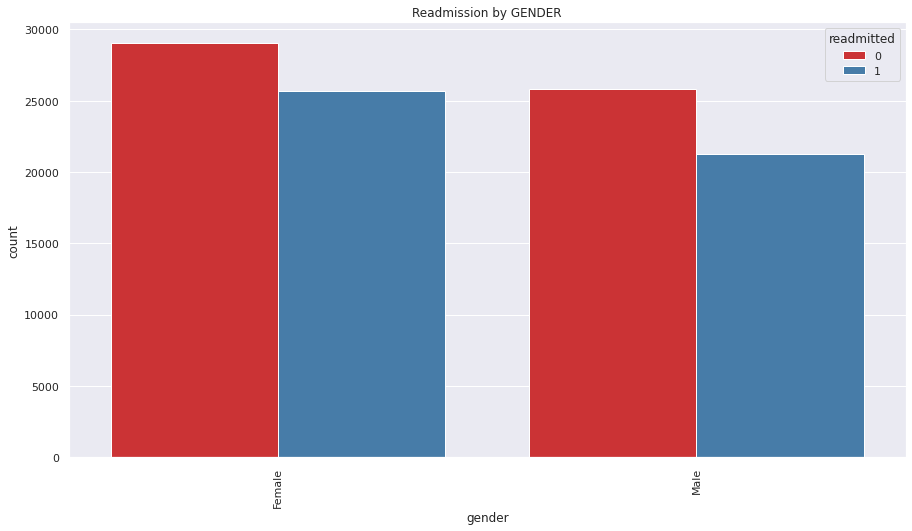

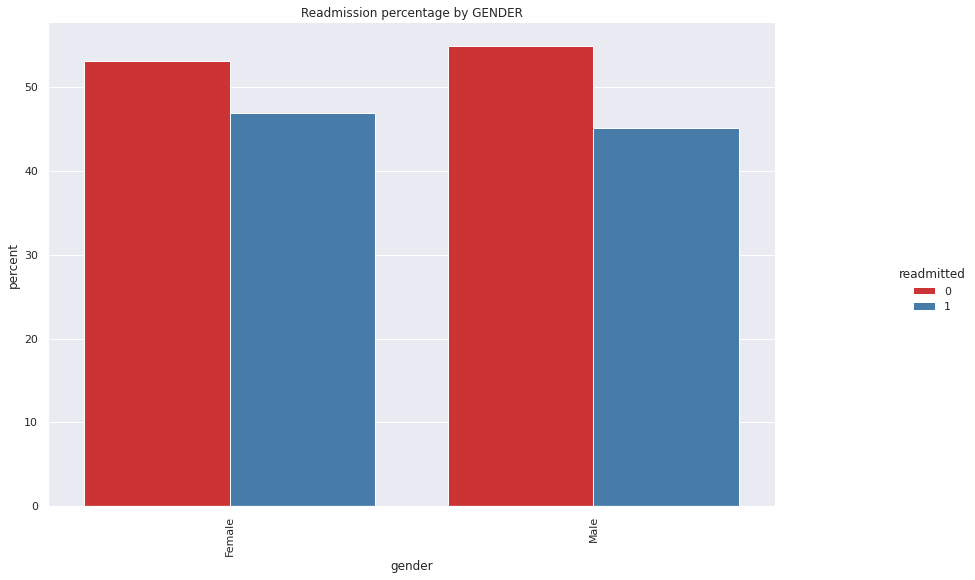

gender        Female      Male
readmitted                    
0           0.530782  0.548783
1           0.469218  0.451217

In [33]:
# Deleting invalid rows
df = df[df.gender != "Unknown/Invalid"]

plotCountAndPercentage('gender')

**Conclusion**:  Looks like gender has no significant effect on readmission, as the percentage of readmission doesn't vary between genders. We might delete this column later to reduce the dataset's dimention.

### Age

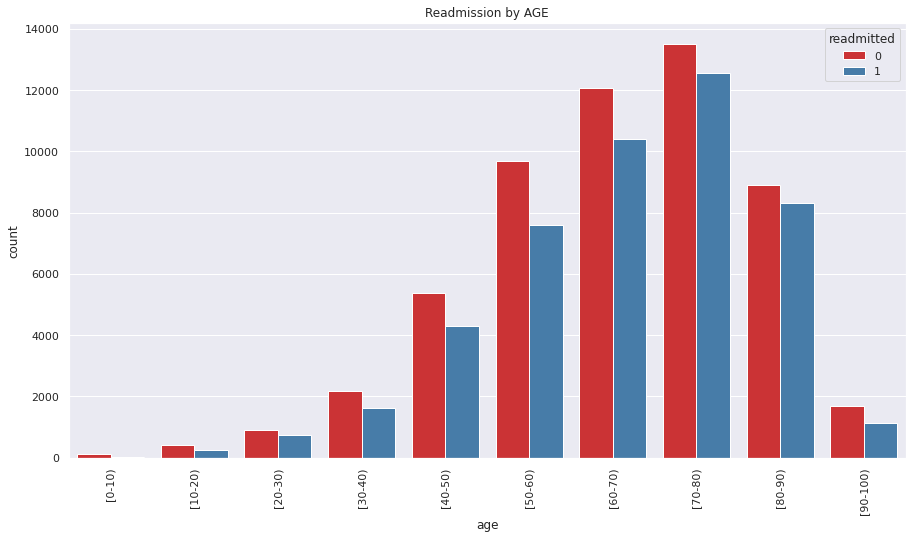

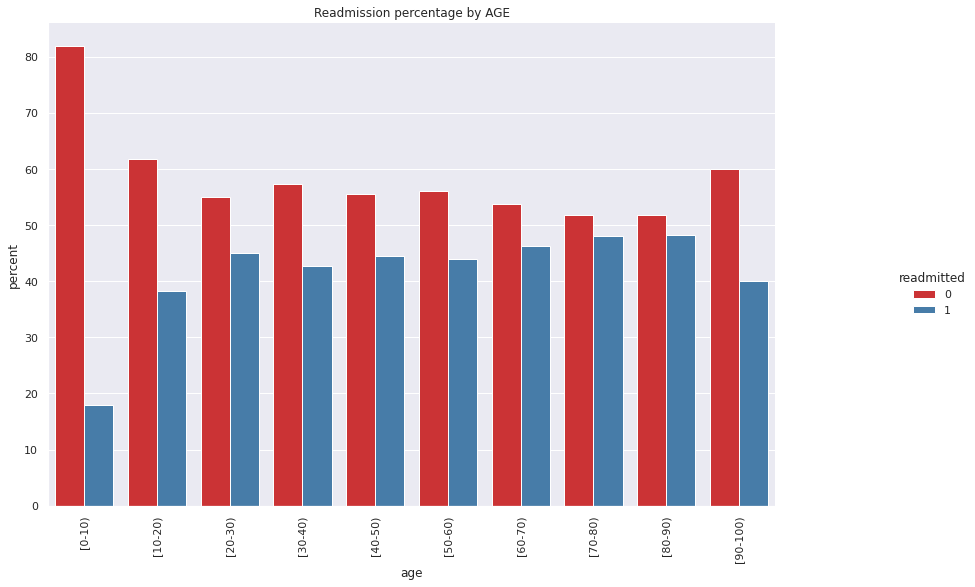

age           [0-10)   [10-20)   [20-30)  ...  [70-80)  [80-90)  [90-100)
readmitted                                ...                            
0           0.819876  0.617945  0.549789  ...  0.51876   0.5173  0.599714
1           0.180124  0.382055  0.450211  ...  0.48124   0.4827  0.400286

[2 rows x 10 columns]

In [34]:
plotCountAndPercentage('age')

**Conclusion**: As opposed to the two previous columns, age does have a role in readmission probability.

It seems to have a larger effect at a young age, but data on these ages is scarce.

### Payer code

The data was taken taken from hospitals in the USA. The payer code 

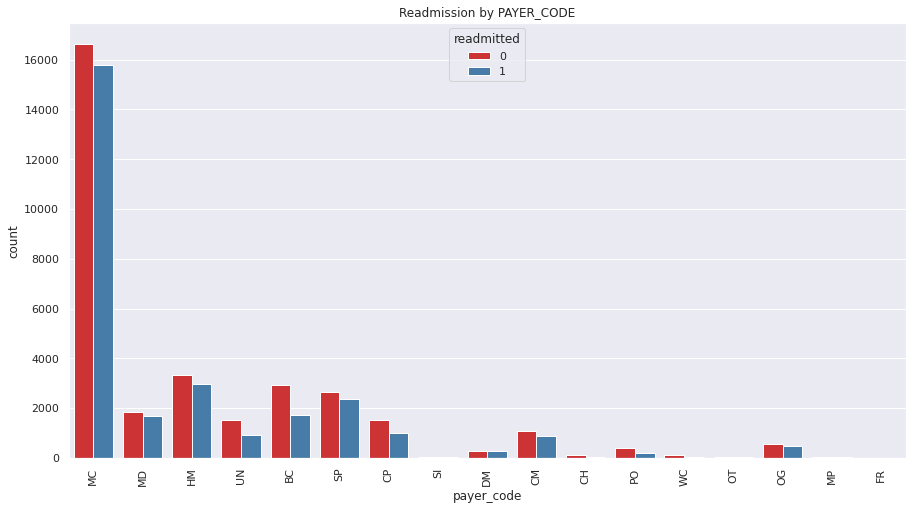

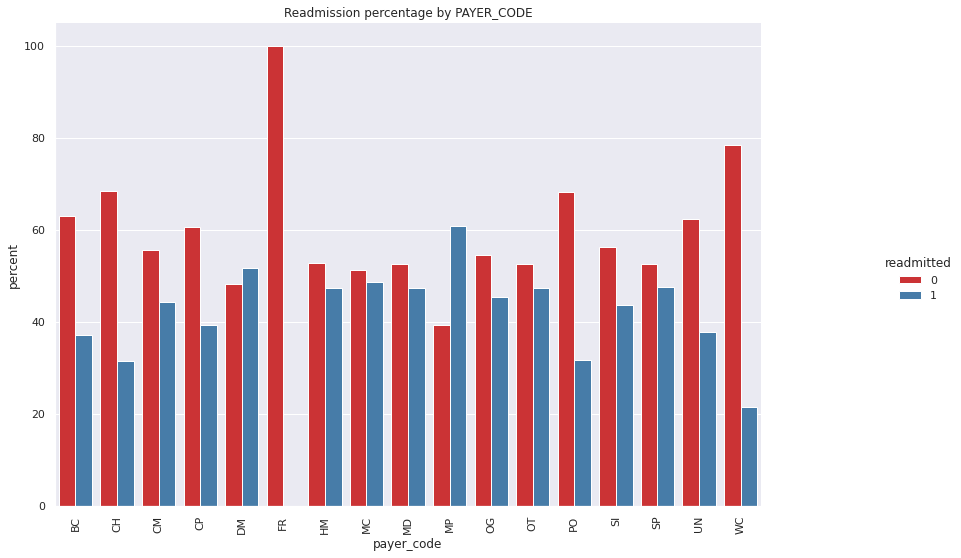

payer_code        BC        CH        CM  ...        SP        UN        WC
readmitted                                ...                              
0           0.629001  0.684932  0.556531  ...  0.524865  0.622958  0.785185
1           0.370999  0.315068  0.443469  ...  0.475135  0.377042  0.214815

[2 rows x 17 columns]

In [35]:
plotCountAndPercentage('payer_code')

**Conclusion**: The payer code column still has 40% of missing data, but the the data that does exist seems valuable.

Also here need to be notice that on some features there is a small amount of data.

### Medical specialty

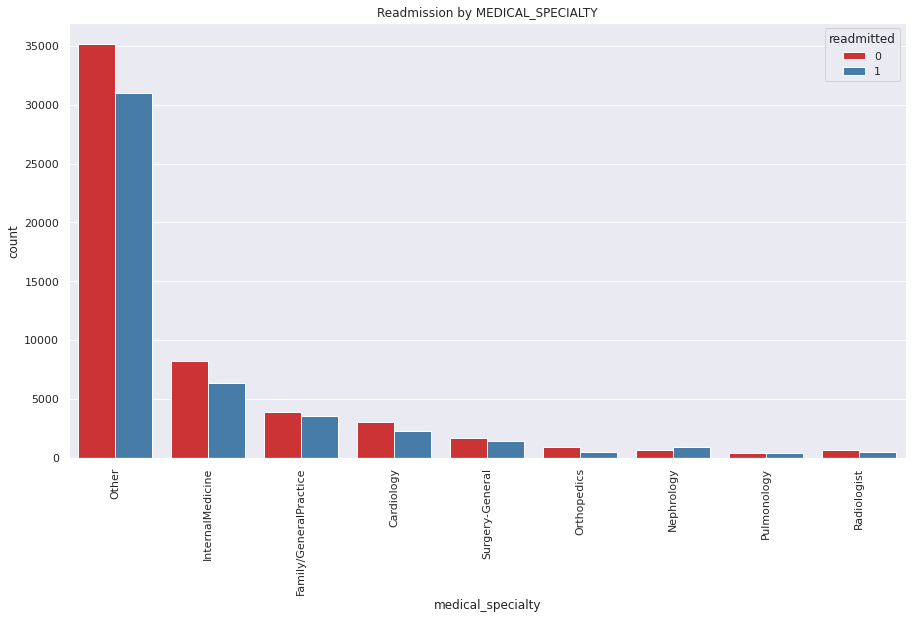

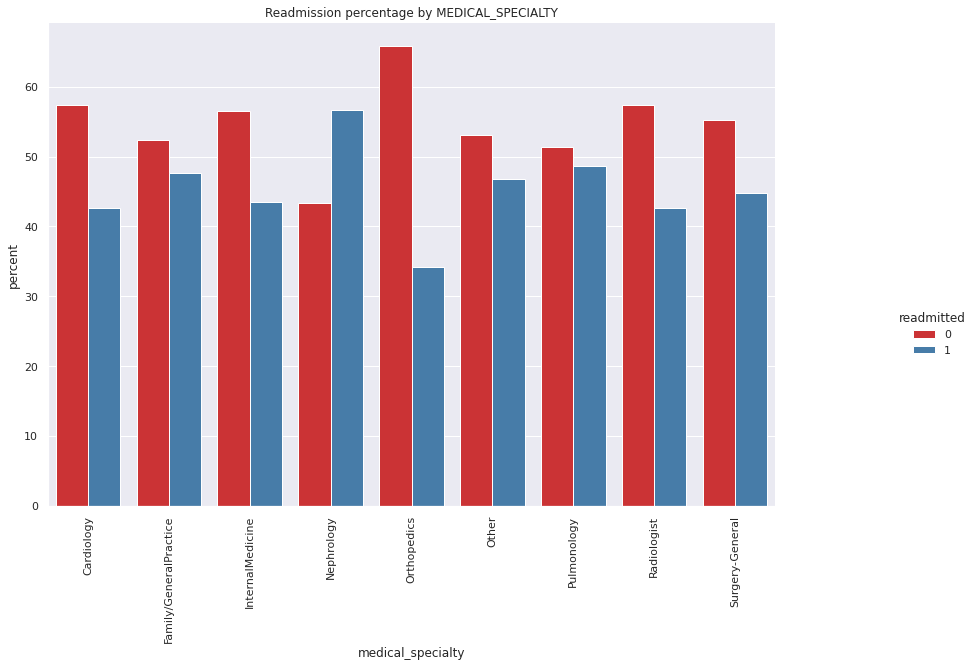

medical_specialty  Cardiology  ...  Surgery-General
readmitted                     ...                 
0                    0.574285  ...         0.552114
1                    0.425715  ...         0.447886

[2 rows x 9 columns]

In [36]:
plotCountAndPercentage('medical_specialty')

The data is hard to interpet visualy using the count and percentage plots. It also looked like the most extreme percent values come from the specialists who had the least patients.

We have decided to look at the relationship between the patient count for each speciality and the percentage of readmitted patients. We made a scatter plot to visualize this relationsip. Upon looking a the plot, it was clear that a higher patient count moved the readmission percentage closer to the global value (11%), while lower patient count had much wider range of values.

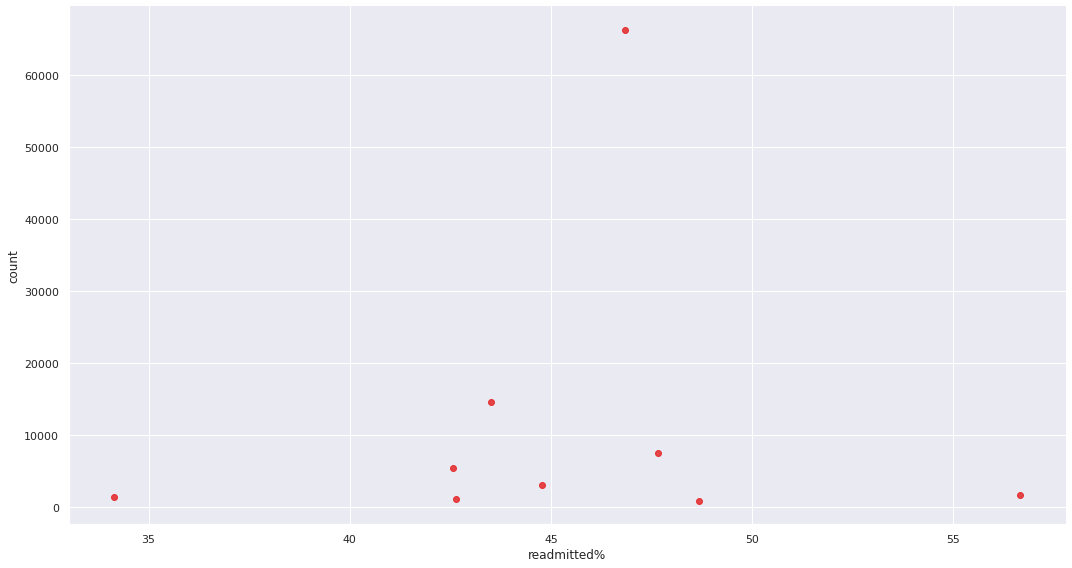

In [37]:
count = df.groupby("medical_specialty").count().iloc[:,[-1]].rename(columns={"readmitted":'count'})
readmit_count = df[df.readmitted == 1].groupby("medical_specialty").count().iloc[:,[-1]].rename(columns={"readmitted":'readmitted%'})
med_speciality = count.join(readmit_count, how="outer").fillna(0)
med_speciality["readmitted%"] = med_speciality["readmitted%"] / med_speciality["count"] * 100
sns.lmplot(x="readmitted%", y="count", data=med_speciality, fit_reg=False, height=8, aspect=15/8)

**conclusion**: We're still unsure if this column is valuable or not, we might delete it later.

## Categorical medication data

Now we want to look at the following columns:
*    change
*    diabetesMed
*    the 24 specific medication column

###change

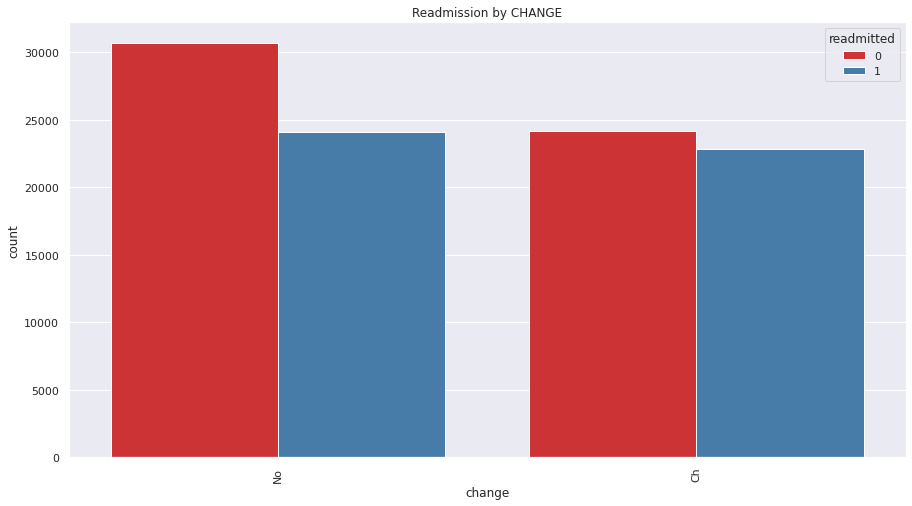

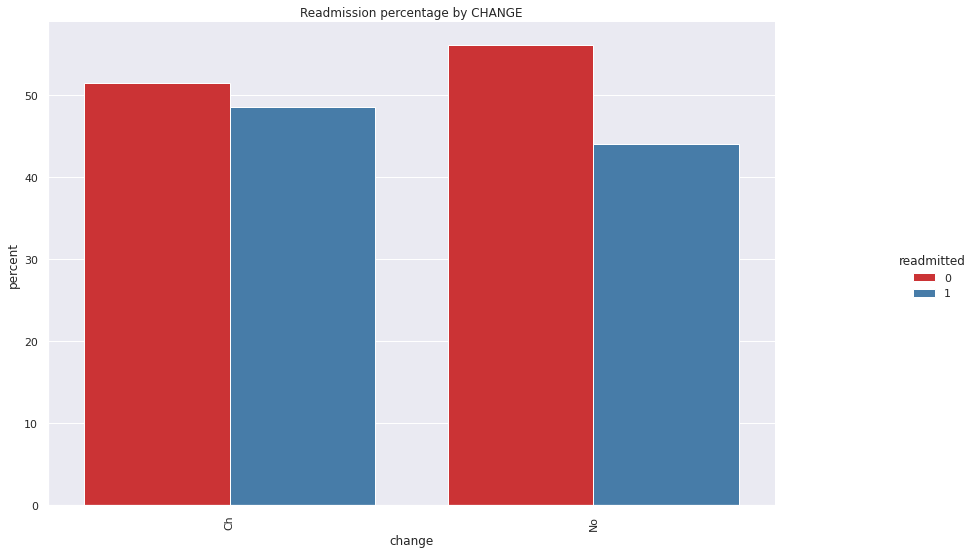

change            Ch        No
readmitted                    
0           0.514348  0.560361
1           0.485652  0.439639

In [38]:
plotCountAndPercentage('change')

**conclusion**: Looks like patients who had change in medication are more likely to be readmitted.

### Diabetes medications

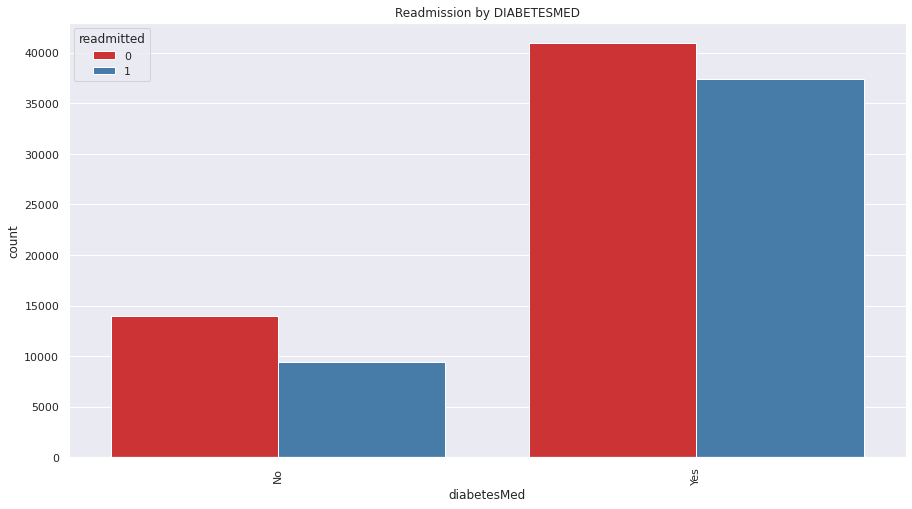

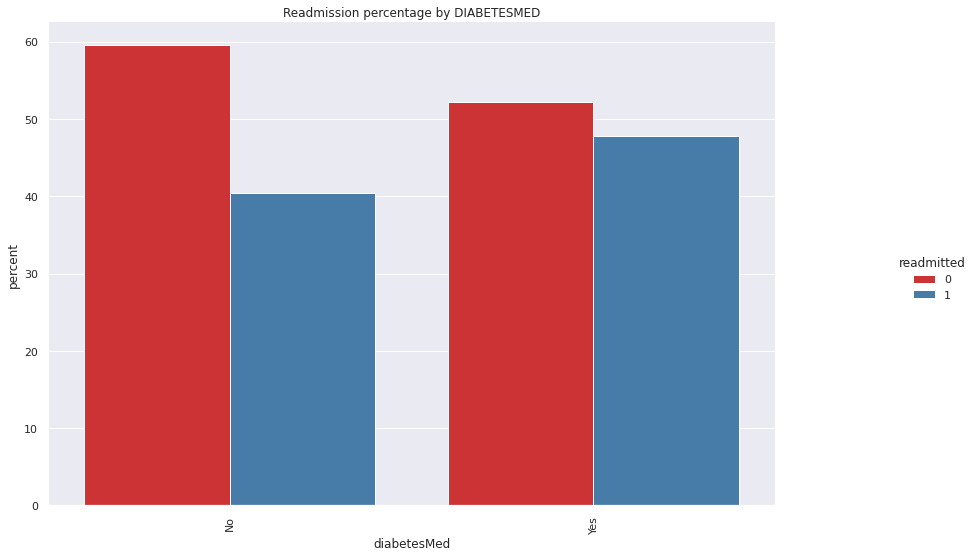

diabetesMed        No       Yes
readmitted                     
0            0.595206  0.522352
1            0.404794  0.477648

In [39]:
plotCountAndPercentage('diabetesMed')

**conclusion**: Looks like patients who do not take diabetes medications are less likely to be readmitted early.

### 25 medication columns

Let's try displaying the 25 medication columns.

In [40]:
def med_col_to_df(column):
  readmitted_count = df[df["readmitted"] == 1].groupby(column).count().iloc[:,[-1]].rename(columns={"readmitted":"readmitted count"})
  non_readmitted_count = df[df["readmitted"] == 0].groupby(column).count().iloc[:,[-1]].rename(columns={"readmitted":"non readmitted count"})
  return readmitted_count.join(non_readmitted_count)

columns = [med_col_to_df(col) for col in df.columns[24:47]]

med_counts = pd.concat(columns, keys=df.columns[24:47])
display(med_counts.T)

metformin  ... metformin-pioglitazone
                          Down  ...                     No
readmitted count         259.0  ...                46902.0
non readmitted count     316.0  ...                54860.0

[2 rows x 68 columns]

We can see that no one or very few people (<40) take the following medications:

*    acetohexamide
*    tolbutamide
*    miglitol
*    troglitazone
*    tolazamide
*    examide
*    citoglipton	
*    glipizide-metformin
*    glimepiride-pioglitazone
*    metformin-rosiglitazone
*    metformin-pioglitazone

We can proceed to remove the from the dataset.

In [41]:
df.drop(labels=["acetohexamide", "tolbutamide", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton",
                "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"],
                axis=1, inplace=True)

med_counts.drop(labels=["acetohexamide", "tolbutamide", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton",
                        "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"],
                         axis=0, inplace=True)

Let's calculate the percentages of readmitted patients for each medication and change:

In [42]:
total_count_readmitted = df[df["readmitted"] == 1].readmitted.count() 
total_count_non_readmitted = df[df["readmitted"] == 0].readmitted.count()

readmitted_percent = med_counts['readmitted count'] / total_count_readmitted * 100

non_readmitted_percent = med_counts['non readmitted count'] / total_count_non_readmitted * 100

med_percent = pd.concat([readmitted_percent, non_readmitted_percent], axis=1)

med_percent.T

metformin             ... glyburide-metformin          
                          Down         No  ...              Steady        Up
readmitted count      0.552215  81.567950  ...            0.712123  0.002132
non readmitted count  0.576001  79.325933  ...            0.652558  0.012760

[2 rows x 47 columns]

**conclusion**: The medication data we have left looks valuable.


In [43]:
identifiers = [
       'encounter_id',
        'patient_nbr'       
]

## Numerical data

In [44]:
numerical = [x for x in df.columns if x not in categorical and x not in identifiers] 
numerical.remove('readmitted')
numerical

['age',
 'weight',
 'long_stay',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

Let's list the numerical columns:

We would like to look at the numerical columns to see if we could notice interesting patterns.

### Histograms

Converting input from bool to <class 'numpy.uint8'> for compatibility.
Converting input from bool to <class 'numpy.uint8'> for compatibility.


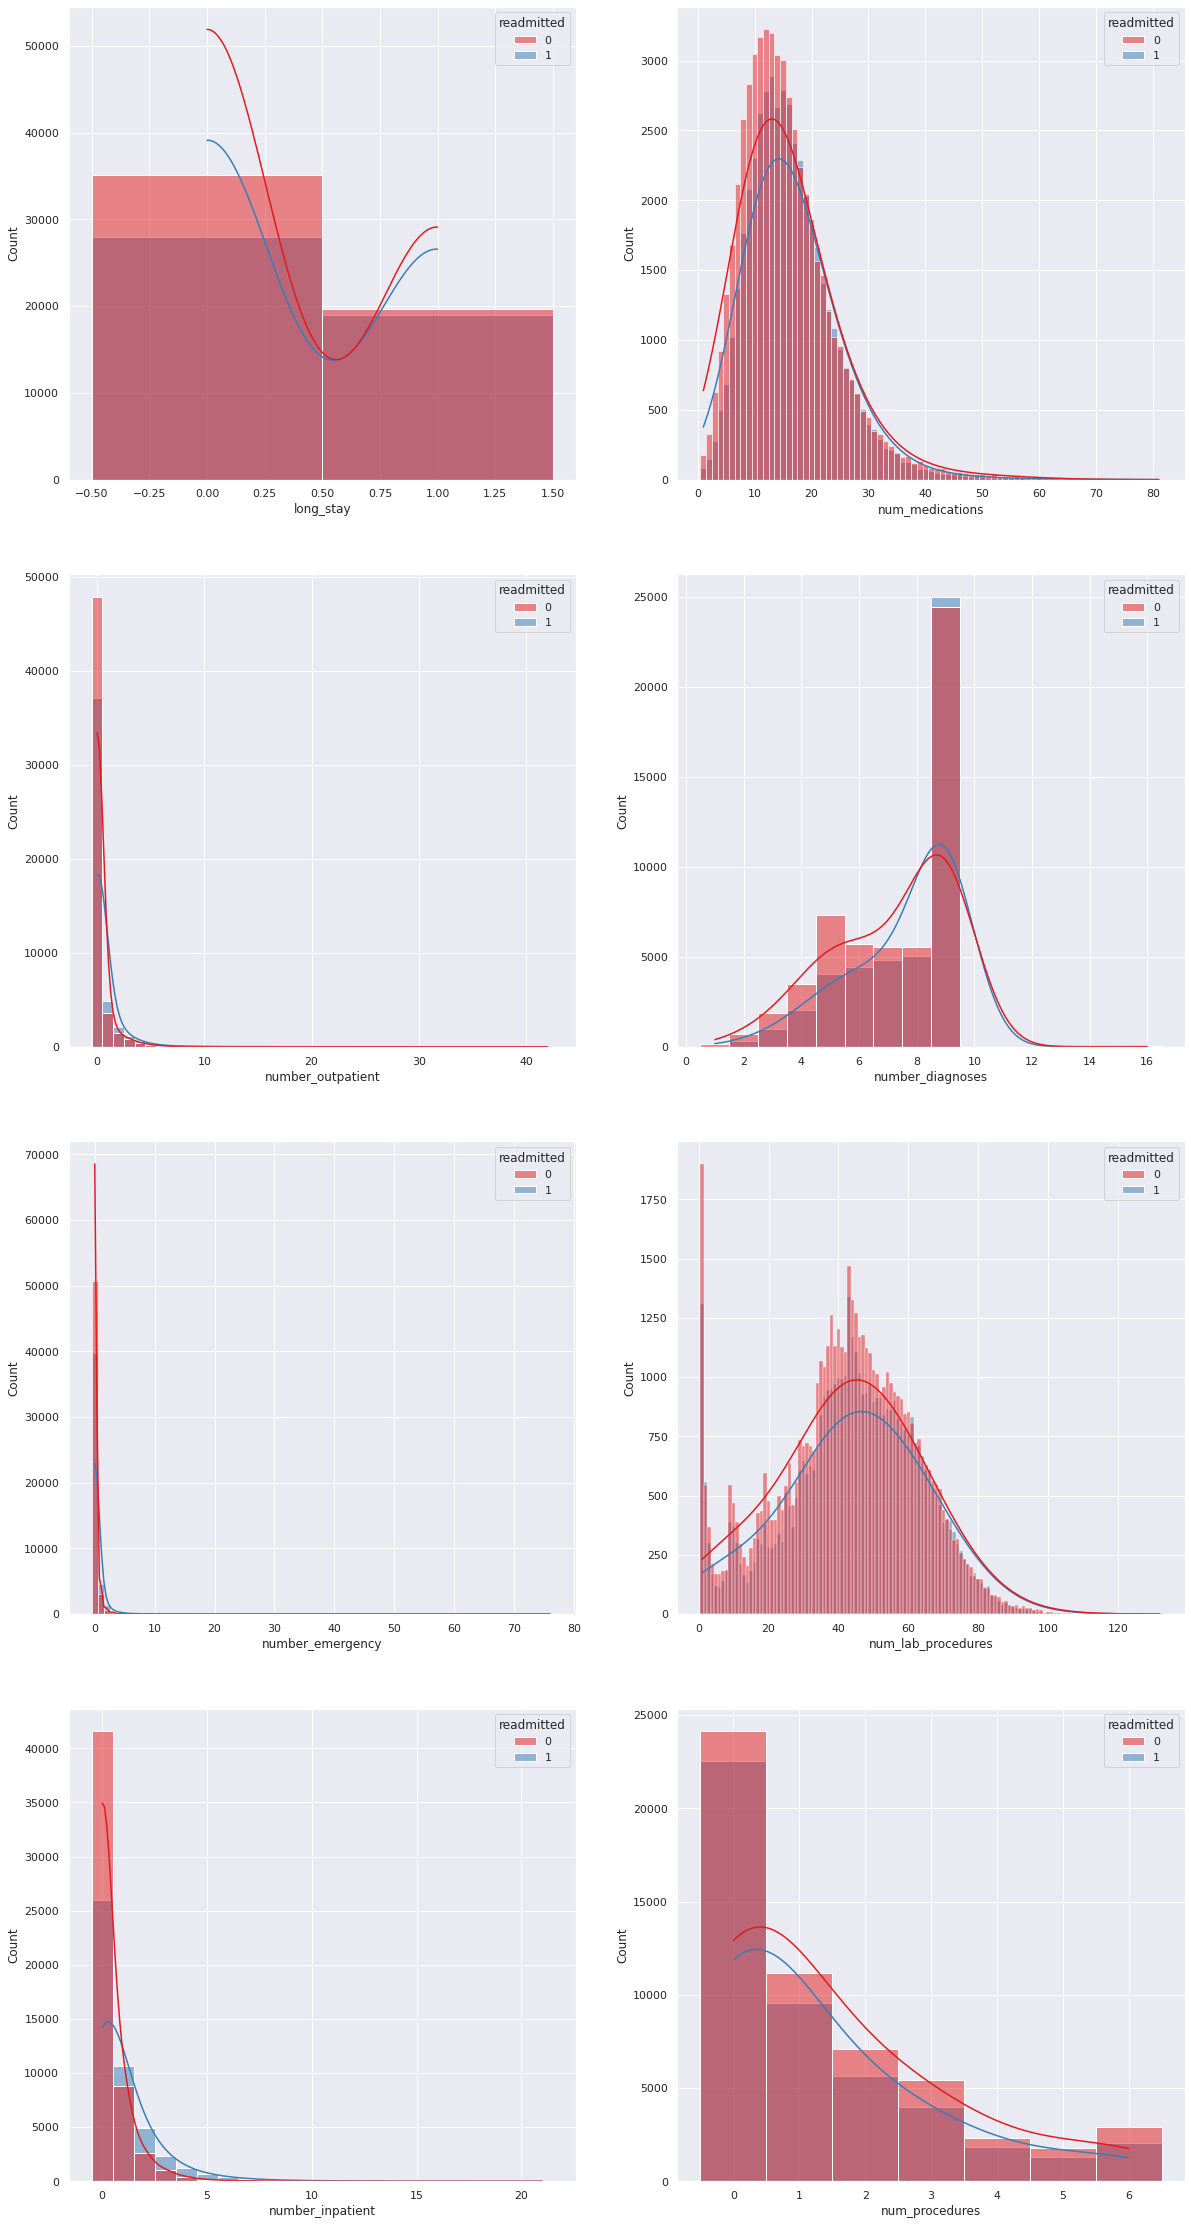

In [45]:
f, axes = plt.subplots(4, 2, figsize=(20,40))

sns.histplot(data=df, x="long_stay", hue="readmitted", ax=axes[0,0], kde=True, discrete=True, kde_kws={'bw_adjust': 5})
sns.histplot(data=df, x="num_medications", hue="readmitted", ax=axes[0,1], kde=True, discrete=True, kde_kws={'bw_adjust': 5})
sns.histplot(data=df, x="number_outpatient", hue="readmitted", ax=axes[1,0], kde=True, discrete=True, kde_kws={'bw_adjust': 5})
sns.histplot(data=df, x="number_diagnoses", hue="readmitted", ax=axes[1,1], kde=True, discrete=True, kde_kws={'bw_adjust': 5})
sns.histplot(data=df, x="number_emergency", hue="readmitted", ax=axes[2,0], kde=True, discrete=True, kde_kws={'bw_adjust': 5})
sns.histplot(data=df, x="num_lab_procedures", hue="readmitted", ax=axes[2,1], kde=True, discrete=True, kde_kws={'bw_adjust': 5})
sns.histplot(data=df, x="number_inpatient", hue="readmitted", ax=axes[3,0], kde=True, discrete=True, kde_kws={'bw_adjust': 5})
sns.histplot(data=df, x="num_procedures", hue="readmitted", ax=axes[3,1], kde=True, discrete=True, kde_kws={'bw_adjust': 5})

Unfortunately, we couldn't find any noteworthy conclusions about the numerical data so far.

# Handling missing values

We have decided to look at the pecentage of missing data in each column. The table below shows the pecentage of missing data, sorted in descending fashion.

In [46]:
na_count = df.isna().sum().sort_values(ascending=False)
na_percentage = na_count[na_count>0] / df.shape[0] * 100
display(na_percentage)

weight                      96.858387
payer_code                  39.557600
admission_type_id           10.215894
admission_source_id          6.821733
discharge_disposition_id     4.598921
race                         2.231656
diag_3                       1.398347
diag_2                       0.351798
diag_1                       0.020636
dtype: float64

## 'weight' cleaning

The weight category is the most problematic one, with 97% of missing data. We want to investigate how weight splits and how much of the sparse weight data is valuable.

At fisrt, we looked at the weight distribution in the non-null values and the readmission probability by weight (leftmost and center plots).

We spotted that the lowest weight category [0-25) had the highest probability for readmission, and speculated that this weight category belongs to young children and infants. We went on to investigate the readmission probability by age - a column without any missing values.

Text(0.5, 1.0, 'Readmission probability by age')

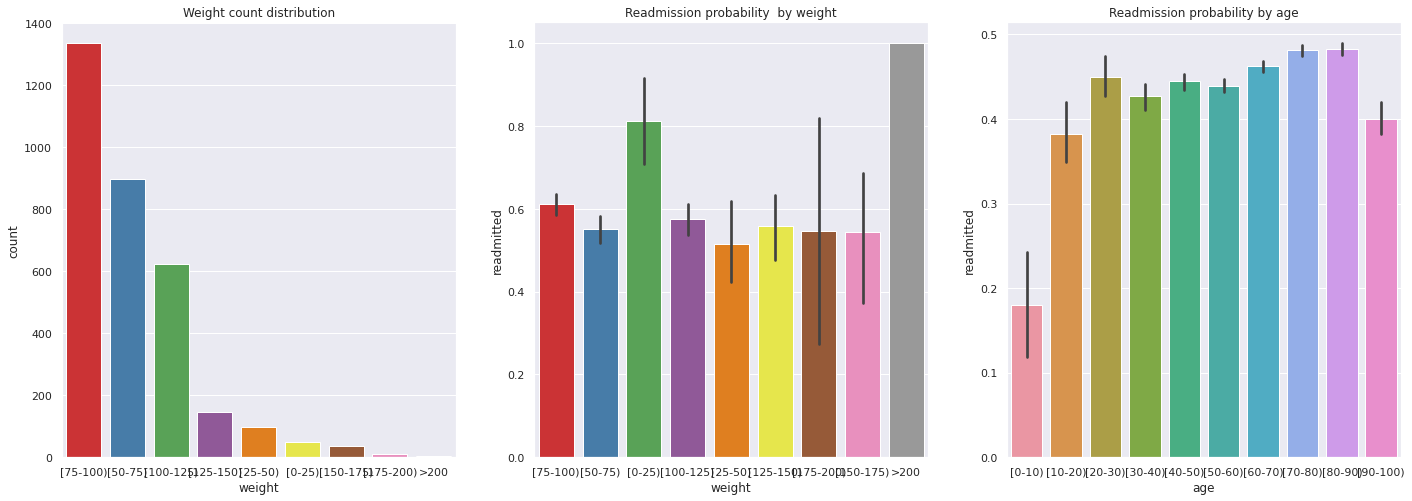

In [47]:
f, axes = plt.subplots(1, 3, figsize=(24,8))

#  Weight data distribution
sns.countplot(x='weight', data = df, order=df['weight'].value_counts().index, ax=axes[0])
axes[0].set_title("Weight count distribution")

#  Readmission by weight
sns.barplot(x = "weight", y = "readmitted", data = df, ax=axes[1])
axes[1].set_title("Readmission probability  by weight")

#  Readmission by age
sns.barplot(x = "age", y = "readmitted", data = df, ax=axes[2])
axes[2].set_title("Readmission probability by age")

Now, looking at the readmission probability  by age (rightmost plot), we can see that young children aged [0-10) are the least likely to be readmitted in under 30 days. This may be a clue that including the weight category may skew results and do more harm than good.


**We decided to delete 'weight' column.**

In [48]:
df = df.drop(['weight'], axis=1)

##Remove non relevant fields

In [49]:
df = df.drop(identifiers, axis=1)

## Diagnosis

We will filter value above 50% and other values will be mark as 'other'

In [50]:
diag_list = ['diag_1','diag_2','diag_3']

for col in diag_list:
    df[col].fillna('NaN', inplace=True)

In [51]:
import re
def transformFunc(value):
    value = re.sub("V[0-9]*", "0", value) # V 
    value = re.sub("E[0-9]*", "0", value) # E 
    value = re.sub('NaN', "-1", value) # Nan 
    return value

def transformCategory(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category

In [52]:
for col in diag_list:
    df[col] = df[col].apply(transformFunc)
    df[col] = df[col].astype(float)

for col in diag_list:
    df[col] = df[col].apply(transformCategory)


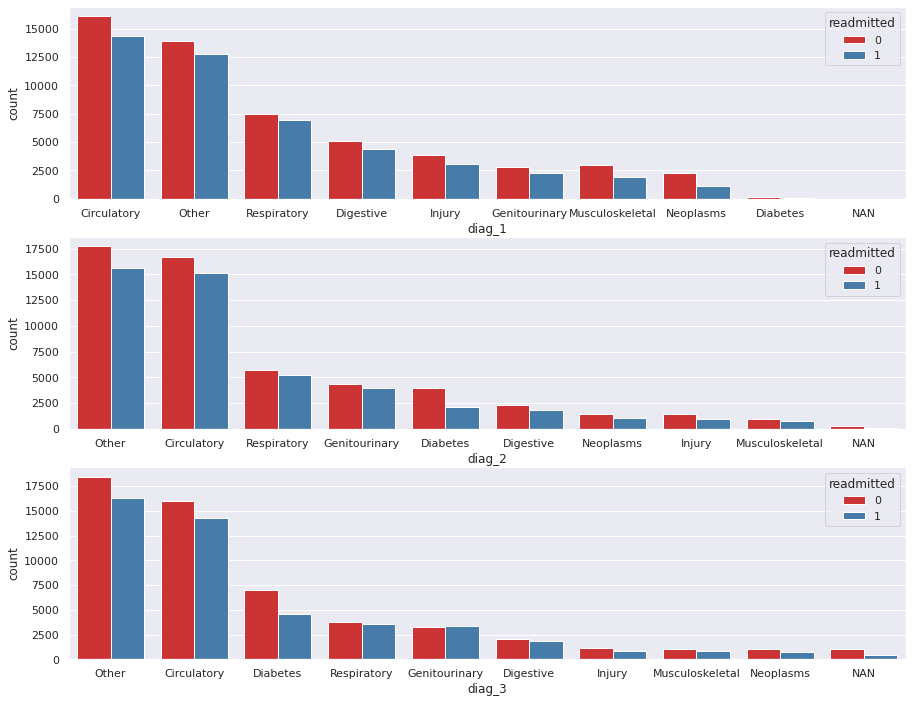

In [53]:
fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(15,12))
row_ax =0
for i in diag_list:
    sns.countplot(x= df[i], hue=df.readmitted, ax=ax[row_ax], order = df[i].value_counts().index);
    row_ax = row_ax+1

After Cleaning the diagnosis columns and plotting the distribution of it, we see that the people diagnosed with Circulatory are the most readmitted

In [ ]:
#df.diag_1.value_counts(normalize=True)


In [ ]:
#df.diag_1 = np.where(df.diag_1.isin([428, 414]), df.diag_1, "other")

In [ ]:
#df.diag_2.value_counts(normalize=True)

In [ ]:
#df.diag_2 = np.where(df.diag_2.isin([276,428,250]), df.diag_2, "other")

In [ ]:
#df.diag_3.value_counts(normalize=True)

In [ ]:
#df.diag_3 = np.where(df.diag_3.isin([250,401,276]), df.diag_3, "other")

In [ ]:
df.head()

In [ ]:
list(df)

Replace null with 'Unknown' as new value in the category because the nulls may have a meaning by itsell and we want to capture it, if so.

In [54]:
df = df.fillna(df.mode().iloc[0])

In [55]:
df.head()

race  gender      age  ... change diabetesMed readmitted
0        Caucasian  Female   [0-10)  ...     No          No          0
1        Caucasian  Female  [10-20)  ...     Ch         Yes          1
2  AfricanAmerican  Female  [20-30)  ...     No         Yes          0
3        Caucasian    Male  [30-40)  ...     Ch         Yes          0
4        Caucasian    Male  [40-50)  ...     Ch         Yes          0

[5 rows x 36 columns]

In [56]:
df.shape

(101763, 36)

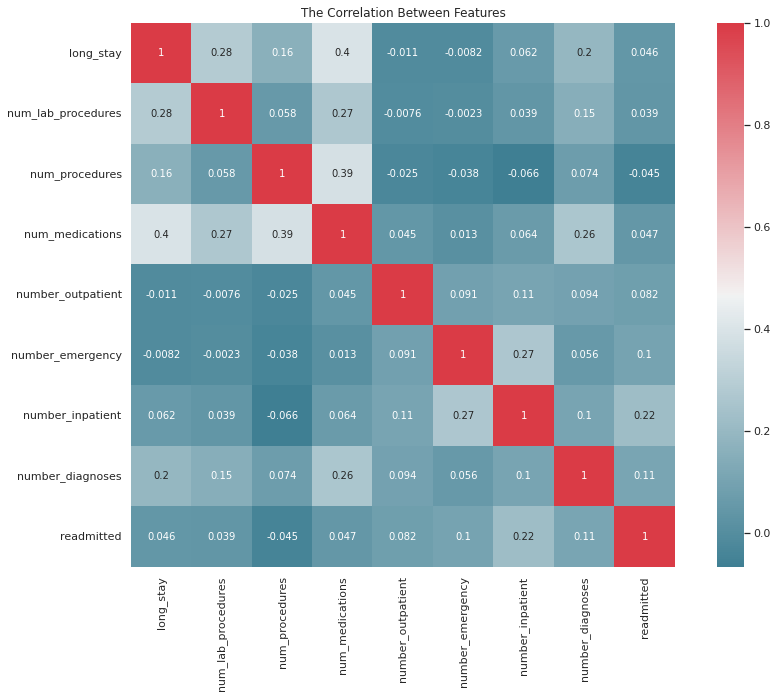

In [57]:
f, ax = plt.subplots(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot = True, ax=ax)
plt.title('The Correlation Between Features')
plt.show()

After looking at the coorelation map, we notice that the coorelations between the feature and the target class are low.

# More Preprocessing

In [58]:
# One hot Encoding Race and Id's 
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
        'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
drugs_to_remove = ["acetohexamide", "tolbutamide", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton",
                "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]
finul_drugs = [x for x in drugs if x not in drugs_to_remove]
anotherCol = ['race', 'A1Cresult', 'max_glu_serum', 'payer_code', 'medical_specialty']
col = finul_drugs + anotherCol
one_hot_data = pd.get_dummies(df, columns=col)

columns_ids = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

one_hot_data[columns_ids] = one_hot_data[columns_ids].astype('str')
one_hot_data = pd.get_dummies(one_hot_data, columns=columns_ids)

In [59]:
# Encoding the Rest of the categorical attributes
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
binary = ['change', 'diabetesMed', 'gender', 'long_stay']
df_dummies = one_hot_data.copy()

for col in diag_list:
    df_dummies[col] = LabelEncoder().fit_transform(df[col])

for col in binary:
    df_dummies[col] = LabelEncoder().fit_transform(df[col])
    
df_dummies['age'] = OrdinalEncoder().fit_transform(df['age'].values.reshape(-1, 1))

In [ ]:
#df_dummies = pd.get_dummies(df, columns = categorical, prefix = categorical, drop_first=True)

In [ ]:
#df_dummies['age'] = OrdinalEncoder().fit_transform(df['age'].values.reshape(-1, 1))

In [60]:
df_dummies.columns

Index(['gender', 'age', 'long_stay', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1',
       ...
       'medical_specialty_Surgery-General', 'admission_type_id_Elective',
       'admission_type_id_Emergency', 'admission_type_id_New Born',
       'admission_type_id_Trauma Center',
       'discharge_disposition_id_Discharged to Home',
       'discharge_disposition_id_Other', 'admission_source_id_Emergency',
       'admission_source_id_Other', 'admission_source_id_Referral'],
      dtype='object', length=110)

In [61]:
df_dummies.head(10)

gender  age  ...  admission_source_id_Other  admission_source_id_Referral
0       0  0.0  ...                          0                             1
1       0  1.0  ...                          0                             0
2       0  2.0  ...                          0                             0
3       1  3.0  ...                          0                             0
4       1  4.0  ...                          0                             0
5       1  5.0  ...                          0                             1
6       1  6.0  ...                          0                             1
7       1  7.0  ...                          0                             0
8       0  8.0  ...                          1                             0
9       0  9.0  ...                          1                             0

[10 rows x 110 columns]

In [62]:
list(df_dummies.columns)

['gender',
 'age',
 'long_stay',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'change',
 'diabetesMed',
 'readmitted',
 'metformin_Down',
 'metformin_No',
 'metformin_Steady',
 'metformin_Up',
 'repaglinide_Down',
 'repaglinide_No',
 'repaglinide_Steady',
 'repaglinide_Up',
 'nateglinide_Down',
 'nateglinide_No',
 'nateglinide_Steady',
 'nateglinide_Up',
 'chlorpropamide_Down',
 'chlorpropamide_No',
 'chlorpropamide_Steady',
 'chlorpropamide_Up',
 'glimepiride_Down',
 'glimepiride_No',
 'glimepiride_Steady',
 'glimepiride_Up',
 'glipizide_Down',
 'glipizide_No',
 'glipizide_Steady',
 'glipizide_Up',
 'glyburide_Down',
 'glyburide_No',
 'glyburide_Steady',
 'glyburide_Up',
 'pioglitazone_Down',
 'pioglitazone_No',
 'pioglitazone_Steady',
 'pioglitazone_Up',
 'rosiglitazone_Down',
 'rosiglitazone_No',
 'rosiglitazone_Steady',
 'rosiglitazone_Up',
 'acarb

In [63]:
df_dummies.shape

(101763, 110)

# PCA

To use PCA, we'll have to do some preprocessing first:

In [64]:
from sklearn.preprocessing import MinMaxScaler

df_PCA = df_dummies.drop(columns="readmitted", axis=1)

scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df_PCA)

In [65]:
data_rescaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.11111111, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.22222222, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.77777778, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.88888889, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.77777778, 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [66]:
data_rescaled_df = pd.DataFrame(data_rescaled, columns=df_dummies.drop(columns="readmitted", axis=1).columns) 
data_rescaled_df.head()

gender       age  ...  admission_source_id_Other  admission_source_id_Referral
0     0.0  0.000000  ...                        0.0                           1.0
1     0.0  0.111111  ...                        0.0                           0.0
2     0.0  0.222222  ...                        0.0                           0.0
3     1.0  0.333333  ...                        0.0                           0.0
4     1.0  0.444444  ...                        0.0                           0.0

[5 rows x 109 columns]

In [67]:
features = data_rescaled.shape[1] + 1

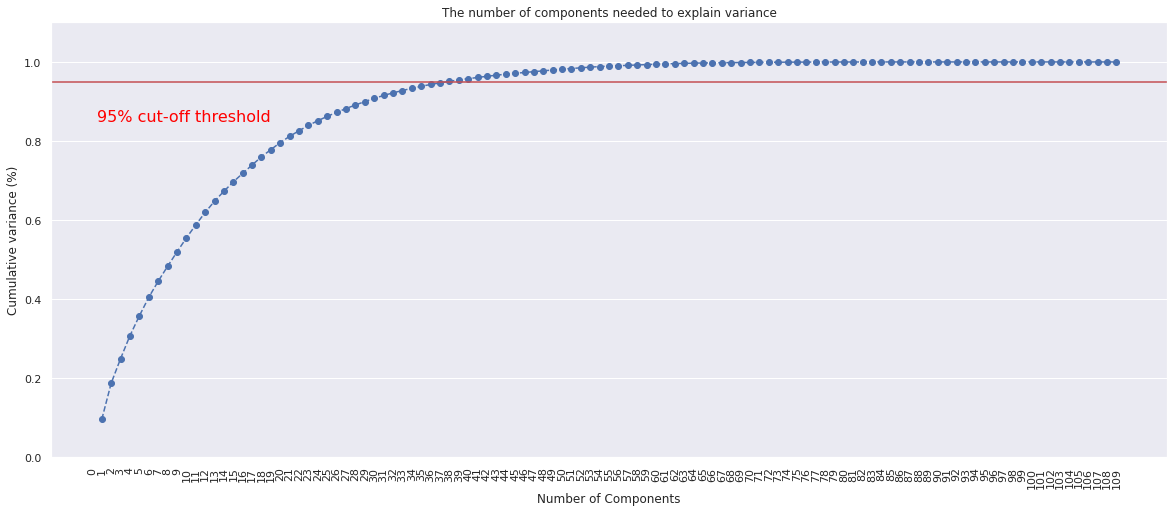

In [68]:
from sklearn.decomposition import PCA

pca = PCA().fit(data_rescaled)

% matplotlib inline
plt.rcParams["figure.figsize"] = (20,8)

fig, ax = plt.subplots()
xi = np.arange(1, features, step=1)
y_explained_variance_ratio_ = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y_explained_variance_ratio_, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, features, step=1), rotation=90) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [69]:
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

In [70]:
reduced

array([[ 8.32028534e-01, -9.60310590e-01, -1.25751499e-01, ...,
        -1.22708321e-01, -4.56077867e-01,  1.32531201e-02],
       [-6.91751560e-01,  3.53791903e-01, -2.01978594e-01, ...,
        -5.92767128e-02, -3.28358091e-01, -1.03788023e-03],
       [-3.15202966e-01, -6.63893593e-01, -6.54924200e-01, ...,
        -6.35375599e-02, -2.45872334e-01, -2.55844798e-03],
       ...,
       [-6.11885478e-01,  7.26557846e-01, -6.28903098e-01, ...,
         5.13559699e-02,  2.59175359e-01,  2.86331163e-02],
       [-8.32319185e-01,  6.44236635e-01,  1.23605759e+00, ...,
         5.79073049e-02,  2.22672827e-01,  9.44836984e-02],
       [-1.10896936e-01, -1.20735115e+00, -3.91321501e-02, ...,
        -1.93193568e-02,  3.57869370e-02, -8.80784018e-03]])

In [71]:
reduced.shape

(101763, 38)

Text(0, 0.5, 'pc2')

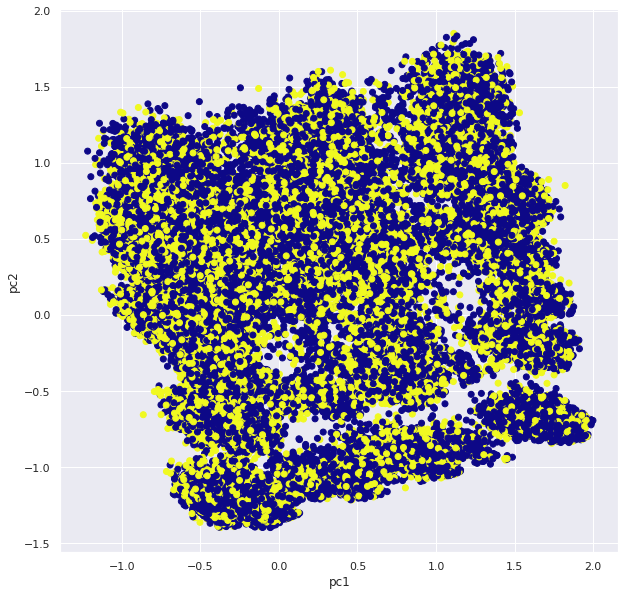

In [72]:
plt.figure(figsize=(10,10))
plt.scatter(reduced[:,0],reduced[:,1],c=df_dummies['readmitted'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

#Clustering


Outlier Removal Using Clustring
DBSCAN technique is used to deal with outliers

minPts is selected based on the domain knowledge. We do not have domain understanding, a rule of thumb is to derive minPts from the number of dimensions D in the data set. minPts >= D + 1. For 2D data, take minPts = 4. For larger datasets, with much noise, it suggested to go with minPts = D. We deciced to go with the last suggestion.

In [73]:
minPts = 38

We want to find out the right value for epsilon for dbscan algorithm.

In [74]:
from sklearn.neighbors import NearestNeighbors
reduced_temp = pd.DataFrame(data_rescaled).sample(n = 10000, random_state = 20)
neigh = NearestNeighbors(n_neighbors=minPts, n_jobs=-1)
nbrs = neigh.fit(reduced_temp)
distances, indices = nbrs.kneighbors(reduced_temp)

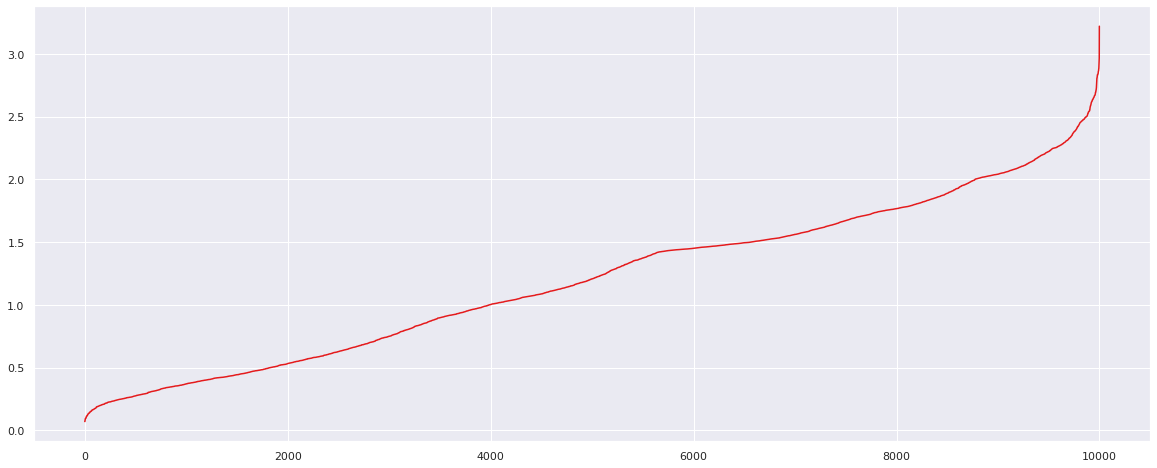

In [75]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

From this graph we can see that around 2.2 is good for eps

In [76]:
epsilon = 2.2

In [77]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=epsilon, min_samples=minPts, n_jobs=-1).fit(reduced)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 556


In [78]:
from collections import Counter
Counter(labels)

Counter({-1: 556, 0: 101207})

DBscan did not create different clusters because they are not separated from each other and because the algorithm is based on density so everything converges into one cluster.

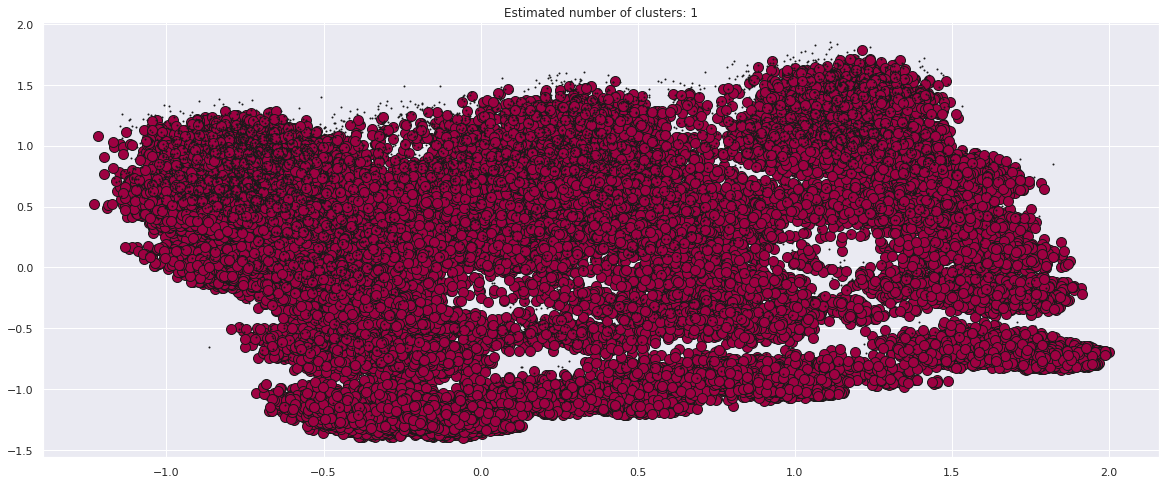

In [79]:
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = reduced[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = reduced[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=1)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

We will use Kmean to find clusters

first we try to find out the right number of clusters

In [80]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(reduced_temp)
    distortions.append(kmeanModel.inertia_)

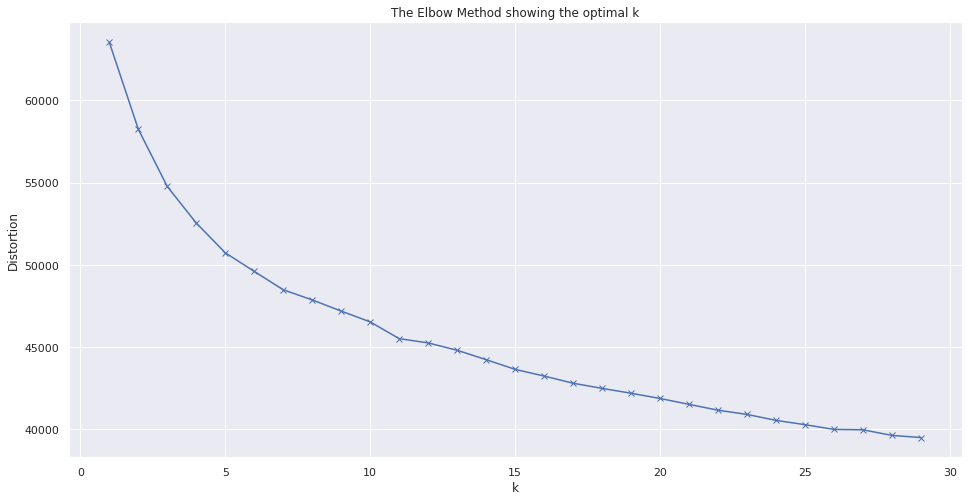

In [81]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

beacuse we can not see clear elbow we think it will be good to make 10 clusters

In [82]:
kmean = KMeans(n_clusters=10, n_jobs=-1).fit(reduced)
core_samples_mask = np.zeros_like(kmean.labels_, dtype=bool)
labels = kmean.labels_

In [83]:
Counter(labels)

Counter({0: 10219,
         1: 11389,
         2: 5202,
         3: 8057,
         4: 19067,
         5: 9230,
         6: 8387,
         7: 10304,
         8: 11150,
         9: 8758})

## Clustering result analysis

We have reached 10 clusters total. To see their properties, let's add the cluster labels to the original dataset:

In [84]:
df["DBSCAN_label"] = pd.Series(labels)

Let's see if there are clusters that have more readmitted patients:

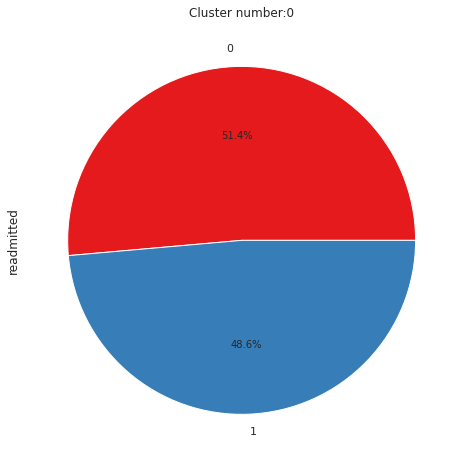

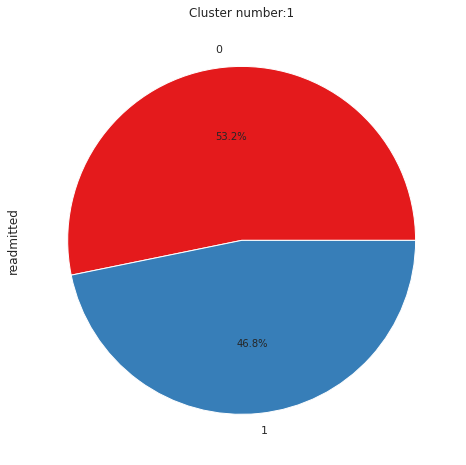

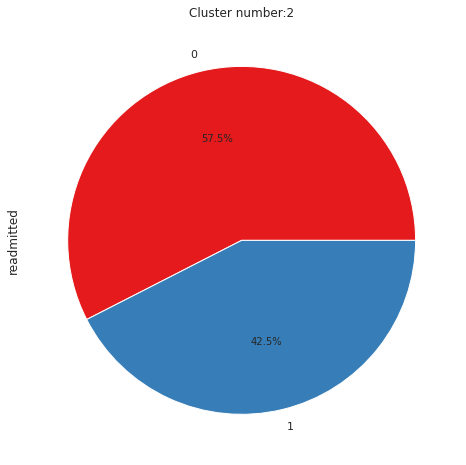

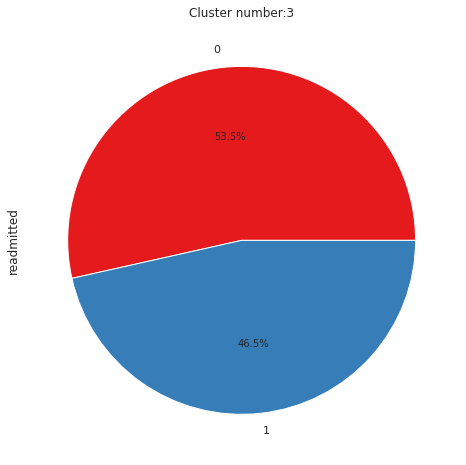

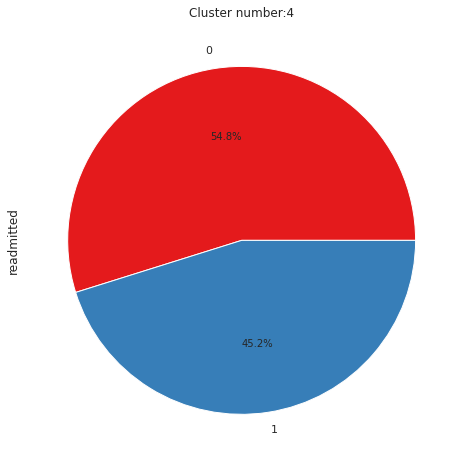

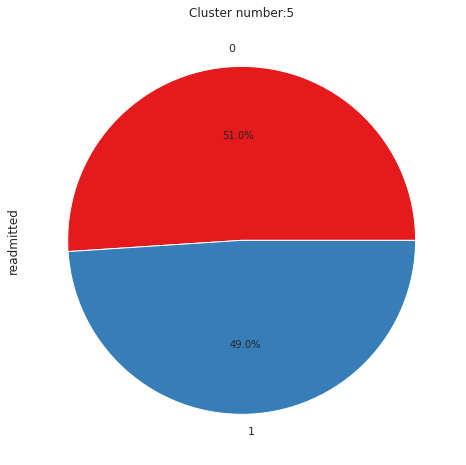

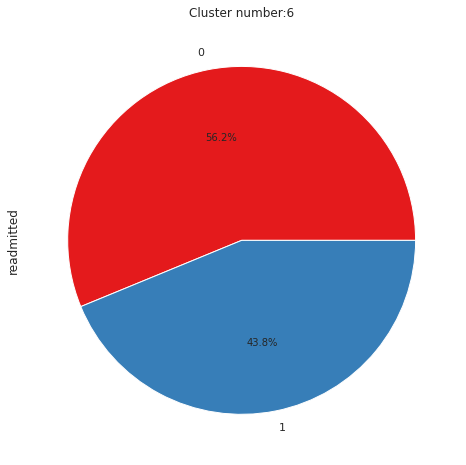

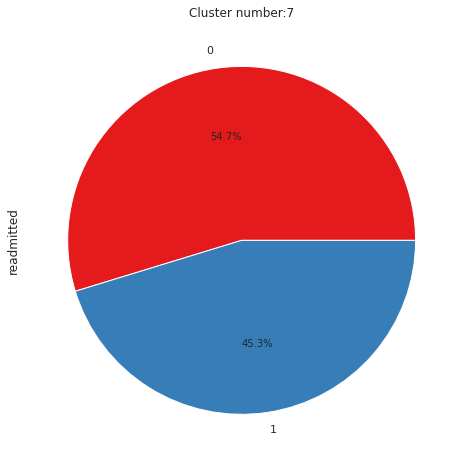

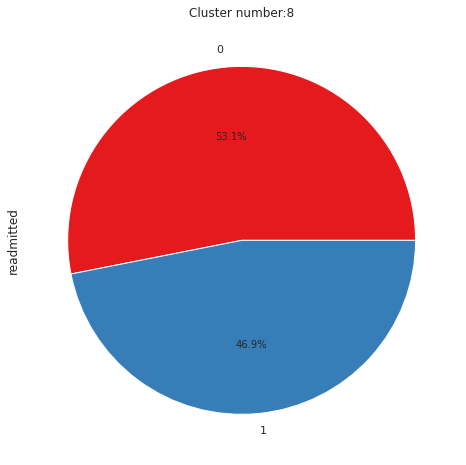

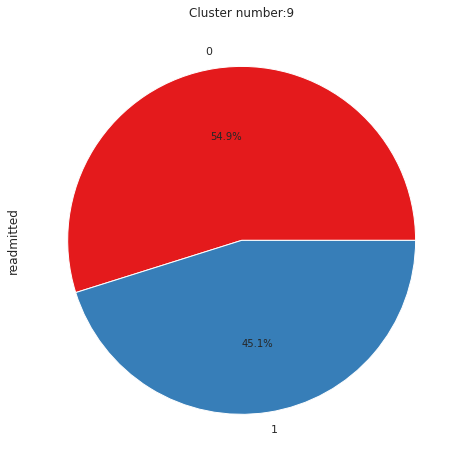

In [85]:
for label in set(labels):
  df[df.DBSCAN_label == label].readmitted.value_counts().plot.pie(autopct = "%.1f%%")
  title = "Cluster number:" + str(label)
  plt.title(title)
  plt.show()

We got some interesting results! We have some clusters with different readmition rates, for example clusters 3 and 9.

#Classification

Define X and y for the next stages

In [86]:
X = df_dummies.drop(columns="readmitted", axis=1)
y = df_dummies.readmitted

In [87]:
from sklearn.metrics import confusion_matrix
def show_cfmatrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')

## Train-test split

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

## Random forest

We're ready to apply the random forest algorithm:

In [89]:
# Fit and predict
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=20, random_state=0)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

Let's look at the performance of the model:

              precision    recall  f1-score   support

           0       0.63      0.75      0.69     16437
           1       0.63      0.49      0.55     14092

    accuracy                           0.63     30529
   macro avg       0.63      0.62      0.62     30529
weighted avg       0.63      0.63      0.62     30529



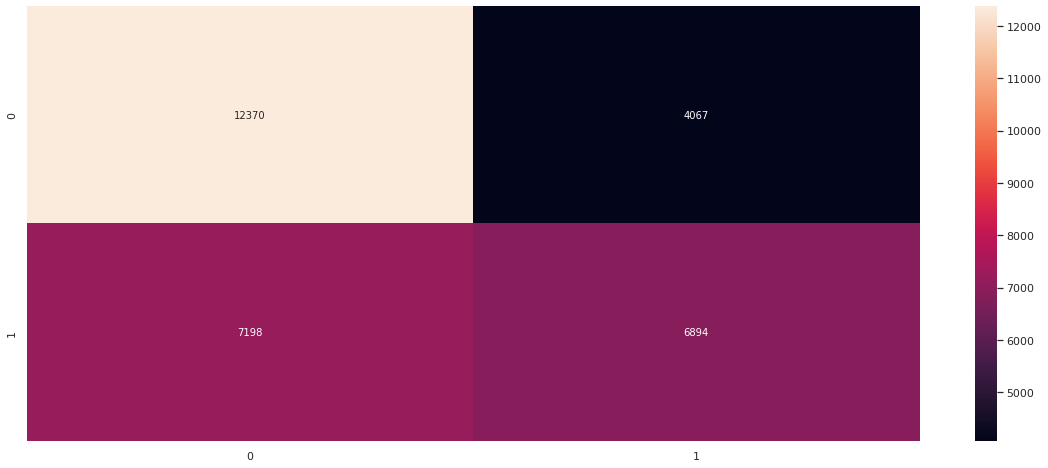

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
show_cfmatrix(y_test, y_pred)

In [91]:
from sklearn.metrics import roc_auc_score
print('roc: ' + str(roc_auc_score(y_test, y_pred)))

roc: 0.6208920793421223


In [92]:
df_importance = pd.DataFrame({"Feature": X.columns, "Importance" : rf_clf.feature_importances_})
df_importance = df_importance.sort_values("Importance", ascending=False)
df_importance

Feature  Importance
8           number_inpatient    0.092914
3         num_lab_procedures    0.082185
5            num_medications    0.077788
1                        age    0.047477
12          number_diagnoses    0.046872
..                       ...         ...
30         chlorpropamide_Up    0.000017
59  glyburide-metformin_Down    0.000010
51             acarbose_Down    0.000004
27       chlorpropamide_Down    0.000002
79             payer_code_FR    0.000000

[109 rows x 2 columns]

##Logistic Regression

We will use the data we rescaled for the PCA analysis, as the logistic regression algorithm performs better on rescaled data.

In [93]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='liblinear', random_state=0)
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.62      0.79      0.69     16437
           1       0.63      0.43      0.51     14092

    accuracy                           0.62     30529
   macro avg       0.62      0.61      0.60     30529
weighted avg       0.62      0.62      0.61     30529



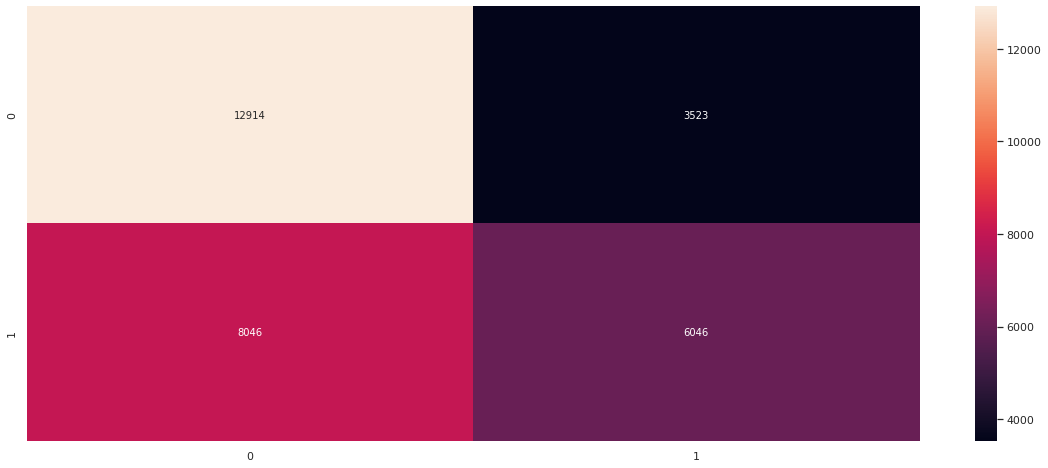

In [94]:
# Evaluate
print(classification_report(y_test, y_pred))
show_cfmatrix(y_test, y_pred)

In [95]:
print('roc: ' + str(roc_auc_score(y_test, y_pred)))

roc: 0.607352118033795


## XGBoost

Fit and predict with XGBClassifier based on result from RandomUnderSampler


In [96]:
import xgboost as xgb
xg_cl = xgb.XGBClassifier(learning_rate= 0.1, max_depth= 6, min_child_weight= 2, n_estimators= 100, subsample= 0.7, random_state=0)

xg_cl.fit(X_train, y_train)
y_pred = xg_cl.predict(X_test)

              precision    recall  f1-score   support

           0       0.64      0.75      0.69     16437
           1       0.63      0.50      0.56     14092

    accuracy                           0.63     30529
   macro avg       0.63      0.63      0.62     30529
weighted avg       0.63      0.63      0.63     30529



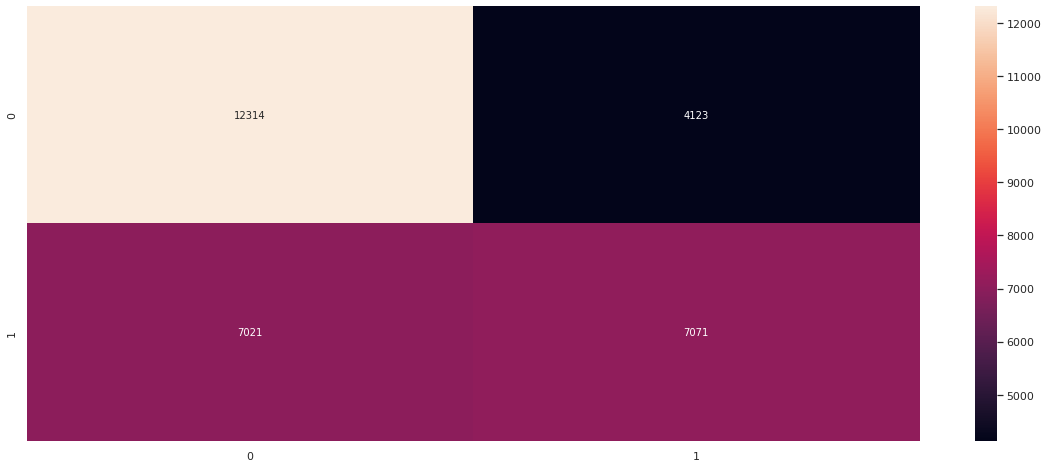

In [97]:
# Evaluate
print(classification_report(y_test, y_pred))
show_cfmatrix(y_test, y_pred)

In [98]:
print('roc: ' + str(roc_auc_score(y_test, y_pred)))

roc: 0.6254687644276306


In [99]:
df_importance = pd.DataFrame({"Feature": X.columns, "Importance" : xg_cl.feature_importances_})
df_importance = df_importance.sort_values("Importance", ascending=False)
df_importance

Feature  Importance
8               number_inpatient    0.139519
107    admission_source_id_Other    0.026295
101  admission_type_id_Emergency    0.022124
7               number_emergency    0.019733
14                   diabetesMed    0.019596
..                           ...         ...
59      glyburide-metformin_Down    0.000000
87                 payer_code_SI    0.000000
62        glyburide-metformin_Up    0.000000
85                 payer_code_OT    0.000000
54                   acarbose_Up    0.000000

[109 rows x 2 columns]

## Voting classifier
We decided to check also a voting classifier with the previous models as the last model we use.

In [100]:
from sklearn.ensemble import VotingClassifier
ensemble1 = VotingClassifier(estimators=[('lr',logmodel),('rf',rf_clf)], voting ='soft', n_jobs=-1)
ensemble2 = VotingClassifier(estimators=[('lr',logmodel),('xg',xg_cl)], voting ='soft', n_jobs=-1)
ensemble3 = VotingClassifier(estimators=[('rf',rf_clf),('xg',xg_cl)], voting ='soft', n_jobs=-1)
ensemble4 = VotingClassifier(estimators=[('lr',logmodel),('rf',rf_clf), ('xg',xg_cl)], voting ='soft', n_jobs=-1)

              precision    recall  f1-score   support

           0       0.63      0.78      0.69     16437
           1       0.64      0.46      0.53     14092

    accuracy                           0.63     30529
   macro avg       0.63      0.62      0.61     30529
weighted avg       0.63      0.63      0.62     30529

roc: 0.6179903960193378


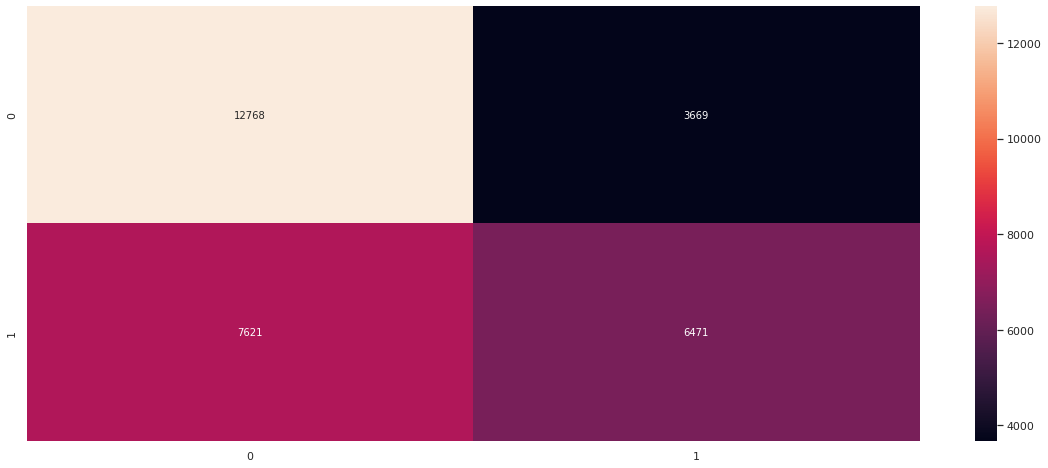

In [101]:
ensemble1.fit(X_train, y_train)
y_pred = ensemble1.predict(X_test)
print(classification_report(y_test, y_pred))
show_cfmatrix(y_test, y_pred)
print('roc: ' + str(roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69     16437
           1       0.63      0.47      0.54     14092

    accuracy                           0.63     30529
   macro avg       0.63      0.62      0.61     30529
weighted avg       0.63      0.63      0.62     30529

roc: 0.6180503795610351


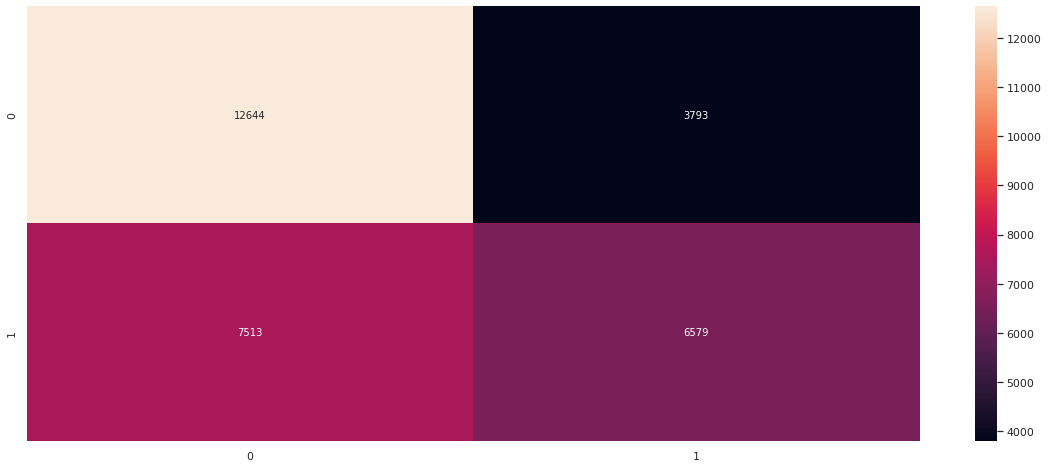

In [102]:
ensemble2.fit(X_train, y_train)
y_pred = ensemble2.predict(X_test)
print(classification_report(y_test, y_pred))
show_cfmatrix(y_test, y_pred)
print('roc: ' + str(roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.64      0.76      0.69     16437
           1       0.63      0.49      0.56     14092

    accuracy                           0.64     30529
   macro avg       0.64      0.63      0.62     30529
weighted avg       0.64      0.64      0.63     30529

roc: 0.6251096985607283


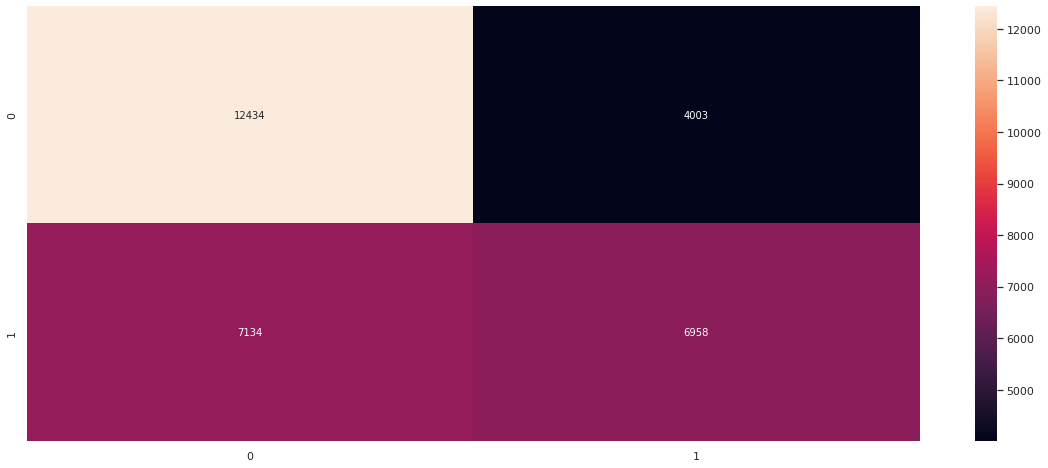

In [103]:
ensemble3.fit(X_train, y_train)
y_pred = ensemble3.predict(X_test)
print(classification_report(y_test, y_pred))
show_cfmatrix(y_test, y_pred)
print('roc: ' + str(roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69     16437
           1       0.64      0.47      0.54     14092

    accuracy                           0.63     30529
   macro avg       0.63      0.62      0.62     30529
weighted avg       0.63      0.63      0.62     30529

0.6203970057376456


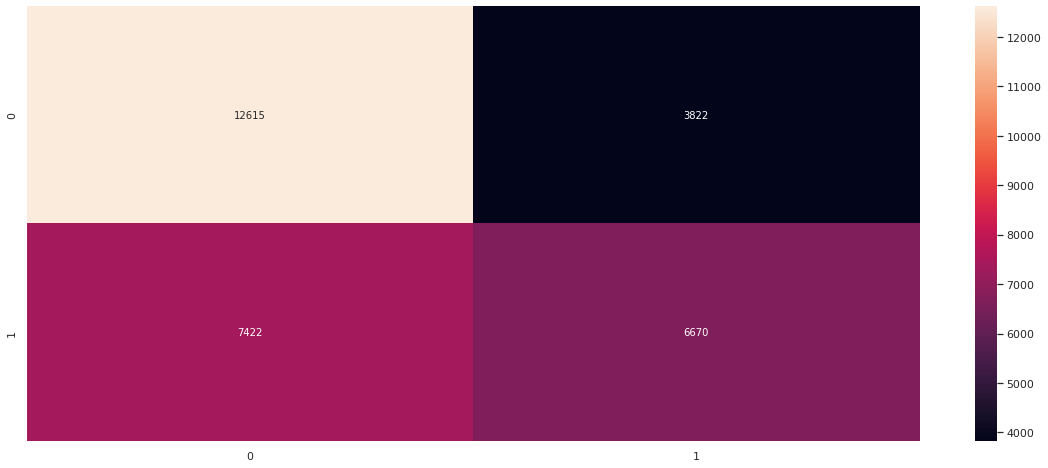

In [104]:
ensemble4.fit(X_train, y_train)
y_pred = ensemble4.predict(X_test)
print(classification_report(y_test, y_pred))
show_cfmatrix(y_test, y_pred)
print(roc_auc_score(y_test, y_pred))

## Using SHAP on XGBoost

We will use SHAP values to explain how the features impact the probability of readmission. **SHAP** (**SH**apley **A**dditive ex**P**lanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions.

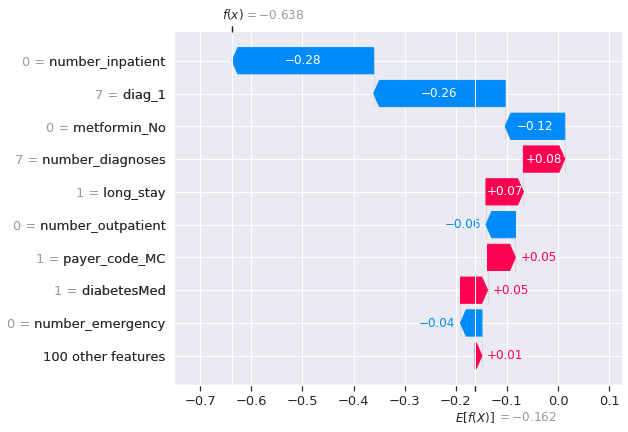

In [105]:
explainer = shap.Explainer(xg_cl)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])


The plot abot shows that patients who were 0 days inpatient and don't take any diabetes medications have a significantly lower chance to be readmitted. 

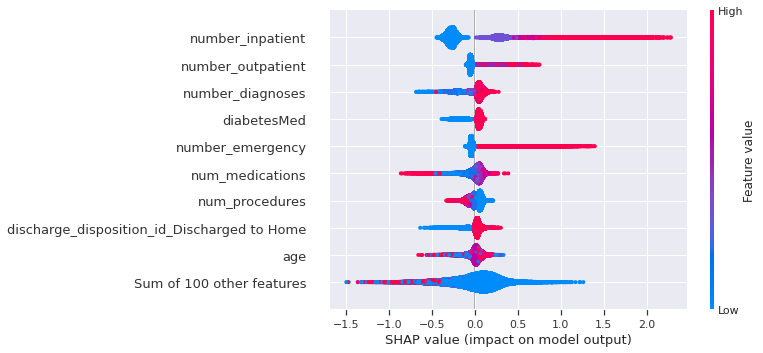

In [106]:
shap.plots.beeswarm(shap_values)

Using the SHAP values and the plots above, we can see that the number of days inpatient is the most important feature in our XGBoost model, and it can be seen that when the value is higher then patients are more likely to be readmitted.

In [107]:
shap.initjs()
shap.plots.force(shap_values[0])

This is just another way to see the first SHAP plot.

# Conclusions

Let's see a quick overview of the models we used:

**Random forest**

Accuracy: 63%

ROC AUC: 0.623

**Logistic regression**

Accuracy: 62%

ROC AUC: 0.610

**XGBoost**

Accuracy: 64%

ROC AUC: 0.626

**Voting classifier 1**

Accuracy: 63%

ROC AUC: 0.621

**Voting classifier 2**

Accuracy: 64%

ROC AUC: 0.623

**Voting classifier 3**

Accuracy: 64%

ROC AUC: 0.627

**Voting classifier 4**

Accuracy: 63%

ROC AUC: 0.623

---

We chose to use two scores to compare the models - accuracy to se the overall accuracy, and ROC AUC as it represents better the number of true positives and true negatives. The best accuracy score we could get is 64%, with the XGBoost and ensenbles 2 and 3 of the voting classifier. This result is not surprising considering those classifiers used the same XGBoost model. We could get a slightly higher ROC AUC with the 3rd voting classifier ensemble. This result is not surprising too - it used the 2 better performing models, random forest and XGBoost. Logistic regression was the worst performing model.

We are quite aware that our results are not good, and we think they can be improved by better preprocessing and building more complex models.